<font color='Blue'> 

# Lending Club Case Study
    
</font> 



### <font color='blue'>Import Modules and Set Display Options </font> 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
os.chdir('/Users/shrinivasd/3Upgrad-Main/Lending Club Case Study')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

### <font color='blue'>Downloading data and loading data as data frame </font> 

In [98]:
# Read file and inspect each column in reference with data dictionary provided
loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### <font color='blue'>Exclude loan status = Current </font> 

In [99]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [100]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']

### <font color='blue'>Find out total rows and columns count post filter </font> 

In [101]:
#Initial rows-39717 & cols-111
loan_df.shape      

(38577, 111)

In [102]:
#few columns have less than 38577 rows , so we have missing data
#few columns have 0 and NaN as row values 
#Data types seems -integet , Float, object
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              38577 non-null  int64  
 1    member_id                       38577 non-null  int64  
 2    loan_amnt                       38577 non-null  int64  
 3    funded_amnt                     38577 non-null  int64  
 4    funded_amnt_inv                 38577 non-null  float64
 5    term                            38577 non-null  object 
 6    int_rate                        38577 non-null  object 
 7    installment                     38577 non-null  float64
 8    grade                           38577 non-null  object 
 9    sub_grade                       38577 non-null  object 
 10   emp_title                       36191 non-null  object 
 11   emp_length                      37544 non-null  object 
 12   home_ownership  

### <font color='blue'>Drop ALL NaN and ALL Zeros Columns </font> 

In [103]:
#Find columns with all Zeros values
zero_cols = loan_df.columns[(loan_df == 0).all()]
loan_df.drop(labels=zero_cols, axis=1, inplace=True)

In [104]:
#Find columns with all NaN values
loan_df.dropna(axis=1, how='all',inplace=True)

### <font color='blue'>Clean Up few more columns as per Busienss Case requirment & Check if any duplciate row</font> 

In [105]:
loan_df= loan_df.drop(['id',
                       'member_id',
                       'url',
                       'desc',
                       'emp_title',
                       'zip_code',
                       'pymnt_plan',
                       'initial_list_status',
                       'application_type',
                       'collections_12_mths_ex_med', 
                       'tax_liens',
                       'chargeoff_within_12_mths',
                       'policy_code',
                       'title'], axis=1)

In [106]:
#Check Df post clean up
loan_df.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

### <font color='blue'>Rename Columns</font> 

In [107]:
loan_df.rename(columns=
               {
                'term':'term_in_months',
                'emp_length':'emp_length_years',  
                'int_rate':'int_rate%',
                'revol_util': 'revol_util%'
               }, 
               
               inplace = True)

###  <font color='blue'>Check for Null values and fill as Not Known</font> 

In [108]:
loan_df.isnull().sum().sort_values(ascending = False).head(6)

mths_since_last_record    35837
mths_since_last_delinq    24905
emp_length_years           1033
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util%                  50
dtype: int64

## <font color='blue'>Data Cleaning</font> 
###  <font color='blue'>Round off and  Clean up & Fill missing values in data</font> 

In [109]:
loan_df['term_in_months'].replace({"months": ""},regex=True, inplace=True)
loan_df['term_in_months'].replace({" ": ""},regex=True, inplace=True)

loan_df['emp_length_years'].replace({"years": ""},regex=True, inplace=True)
loan_df['emp_length_years'].replace({"year": ""},regex=True, inplace=True)
loan_df['emp_length_years'].replace('[+<]', '', regex=True,inplace=True)
loan_df['emp_length_years'].replace({" ": ""},regex=True, inplace=True)

loan_df['int_rate%'].replace('[%]', '', regex=True, inplace=True)
loan_df['revol_util%'].replace('[%]', '', regex=True,inplace=True)

In [110]:
loan_df['revol_util%'] = loan_df['revol_util%'].fillna(0) 

loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(0) 
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].fillna(0) 

loan_df['emp_length_years'] = loan_df['emp_length_years'].fillna('10') 
loan_df['last_pymnt_d'] = loan_df['last_pymnt_d'].fillna('Not Known') 
loan_df['last_credit_pull_d'] = loan_df['last_credit_pull_d'].fillna('Not Known') 
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0) 

In [111]:
loan_df.shape

(38577, 38)

In [112]:
cols_tonumeric = ['annual_inc','installment','total_pymnt_inv',
                  'total_rec_prncp','total_rec_int','total_rec_late_fee',
                 'funded_amnt_inv', 'last_pymnt_amnt',
                 'collection_recovery_fee','pub_rec_bankruptcies',
                  'dti', 'total_pymnt', 'recoveries','mths_since_last_delinq','mths_since_last_record']
loan_df[cols_tonumeric] = loan_df[cols_tonumeric].round(0).astype(int)



cols_tonumeric1 = ['total_pymnt', 'revol_util%', 'int_rate%']
loan_df[cols_tonumeric1] = loan_df[cols_tonumeric1].astype(str).astype(float).round(0).astype(int)


loan_df['inq_last_6mths']  = loan_df['inq_last_6mths'].astype(str)

In [113]:
loan_df.duplicated().any()

False

### <font color='blue'>Check for Null values after clean up</font> 

In [114]:
loan_df.isnull().sum().sort_values(ascending = False).head(6)

loan_amnt                 0
total_pymnt_inv           0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
dtype: int64

In [115]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate%,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util%,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36,11,163,B,B2,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,28,0,Jan-85,1,0,0,3,0,13648,84,9,5863,5834,5000,863,0,0,0,Jan-15,172,May-16,0
1,2500,2500,2500,60,15,60,C,C4,1,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1,0,Apr-99,5,0,0,3,0,1687,9,4,1009,1009,456,435,0,117,1,Apr-13,120,Sep-13,0
2,2400,2400,2400,36,16,84,C,C5,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,9,0,Nov-01,2,0,0,2,0,2956,98,10,3006,3006,2400,606,0,0,0,Jun-14,650,May-16,0
3,10000,10000,10000,36,13,339,C,C1,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20,0,Feb-96,1,35,0,10,0,5598,21,37,12232,12232,10000,2215,17,0,0,Jan-15,357,Apr-16,0
5,5000,5000,5000,36,8,156,A,A4,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11,0,Nov-04,3,0,0,9,0,7963,28,12,5632,5632,5000,632,0,0,0,Jan-15,161,Jan-16,0


In [116]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   loan_amnt                38577 non-null  int64 
 1   funded_amnt              38577 non-null  int64 
 2   funded_amnt_inv          38577 non-null  int64 
 3   term_in_months           38577 non-null  object
 4   int_rate%                38577 non-null  int64 
 5   installment              38577 non-null  int64 
 6   grade                    38577 non-null  object
 7   sub_grade                38577 non-null  object
 8   emp_length_years         38577 non-null  object
 9   home_ownership           38577 non-null  object
 10  annual_inc               38577 non-null  int64 
 11  verification_status      38577 non-null  object
 12  issue_d                  38577 non-null  object
 13  loan_status              38577 non-null  object
 14  purpose                  38577 non-nul

### <font color='blue'>Add derived columns </font> 

In [117]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month


loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year

loan_df ['Years_borrower_in_cr_line'] = loan_df['issue_year'] - loan_df['earliest_cr_line_year']

# We have data issue hence dropping 18 rows as Issue year cant be less than Credit line year
loan_df = loan_df[loan_df ['Years_borrower_in_cr_line'] > 0 ]

In [118]:
loan_df['loan_defaulted']=loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0 )

In [119]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan_df['loan_amnt_catg'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000+'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan_df['annual_inc_catg'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_df['int_rate_catg'] = pd.cut(loan_df['int_rate%'], [0, 10, 13, 16, 20], labels=['0-10', '10-13', '13-16', '16+'])

# categorise dti into buckets for bivariate analysis.
loan_df['dti_catg'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 50], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# Categorise Years_borrower_in_cr_line into buckets for Bivariate analysis
loan_df['Years_borrower_in_cr_line_catg'] = pd.cut(loan_df['Years_borrower_in_cr_line'], [0, 5, 10, 15, 20, 40,50], labels=['0-5', '05-10', '10-15', '15-20', '25-40', '40+'])


### <font color='blue'>Drop Duplicate colume as we have got the derived cols </font> 

In [120]:
loan_df= loan_df.drop(['issue_d',
                        'earliest_cr_line'
                        ], axis=1)

In [121]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate%,installment,grade,sub_grade,emp_length_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util%,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,Years_borrower_in_cr_line,loan_defaulted,loan_amnt_catg,annual_inc_catg,int_rate_catg,dti_catg,Years_borrower_in_cr_line_catg
0,5000,5000,4975,36,11,163,B,B2,10,RENT,24000,Verified,Fully Paid,credit_card,AZ,28,0,1,0,0,3,0,13648,84,9,5863,5834,5000,863,0,0,0,Jan-15,172,May-16,0,2011,12,1985,26,0,0-7000,20000-40000,10-13,25+,25-40
1,2500,2500,2500,60,15,60,C,C4,1,RENT,30000,Source Verified,Charged Off,car,GA,1,0,5,0,0,3,0,1687,9,4,1009,1009,456,435,0,117,1,Apr-13,120,Sep-13,0,2011,12,1999,12,1,0-7000,20000-40000,13-16,0-5,10-15
2,2400,2400,2400,36,16,84,C,C5,10,RENT,12252,Not Verified,Fully Paid,small_business,IL,9,0,2,0,0,2,0,2956,98,10,3006,3006,2400,606,0,0,0,Jun-14,650,May-16,0,2011,12,2001,10,0,0-7000,0-20000,13-16,05-10,05-10
3,10000,10000,10000,36,13,339,C,C1,10,RENT,49200,Source Verified,Fully Paid,other,CA,20,0,1,35,0,10,0,5598,21,37,12232,12232,10000,2215,17,0,0,Jan-15,357,Apr-16,0,2011,12,1996,15,0,7000-14000,40000-60000,10-13,15-20,10-15
5,5000,5000,5000,36,8,156,A,A4,3,RENT,36000,Source Verified,Fully Paid,wedding,AZ,11,0,3,0,0,9,0,7963,28,12,5632,5632,5000,632,0,0,0,Jan-15,161,Jan-16,0,2011,12,2004,7,0,0-7000,20000-40000,0-10,10-15,05-10


###  <font color='blue'>Find continuous and categorical</font> 

In [122]:
data_cols = loan_df.describe().columns
continuous = [col for col in loan_df.columns if col in data_cols]
categorical = [col for col in loan_df.columns if col not in data_cols]

In [123]:
loan_df[continuous].describe().round()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate%,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util%,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,Years_borrower_in_cr_line,loan_defaulted
count,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00,38492.00
mean,11046.00,10783.00,10221.00,12.00,322.00,68759.00,13.00,0.00,13.00,5.00,9.00,0.00,13280.00,49.00,22.00,11865.00,11269.00,9648.00,2119.00,1.00,97.00,13.00,2747.00,0.00,2010.00,7.00,1997.00,14.00,0.00
std,7346.00,7088.00,7021.00,4.00,209.00,64235.00,7.00,0.00,22.00,21.00,4.00,0.00,15858.00,28.00,11.00,8806.00,8697.00,7007.00,2388.00,7.00,696.00,150.00,4496.00,0.00,1.00,3.00,7.00,7.00,0.00
min,500.00,500.00,0.00,5.00,16.00,4000.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,1.00,1969.00,3.00,0.00
25%,5300.00,5200.00,5000.00,9.00,166.00,40000.00,8.00,0.00,0.00,0.00,6.00,0.00,3649.00,25.00,13.00,5513.00,5019.00,4500.00,644.00,0.00,0.00,0.00,218.00,0.00,2010.00,4.00,1993.00,9.00,0.00
50%,9600.00,9550.00,8728.00,12.00,278.00,58800.00,13.00,0.00,0.00,0.00,9.00,0.00,8757.00,49.00,20.00,9675.00,9066.00,8000.00,1301.00,0.00,0.00,0.00,569.00,0.00,2011.00,7.00,1998.00,12.00,0.00
75%,15000.00,15000.00,14000.00,14.00,426.00,82000.00,19.00,0.00,21.00,0.00,12.00,0.00,16902.00,72.00,29.00,16132.00,15320.00,13150.00,2672.00,0.00,0.00,0.00,3448.00,0.00,2011.00,10.00,2001.00,17.00,0.00
max,35000.00,35000.00,35000.00,24.00,1305.00,6000000.00,30.00,11.00,120.00,129.00,44.00,4.00,149588.00,100.00,90.00,58564.00,58564.00,35000.00,23564.00,180.00,29623.00,7002.00,36115.00,2.00,2011.00,12.00,2008.00,42.00,1.00


In [124]:
loan_df[categorical].describe().round().T

,count,unique,top,freq
term_in_months,38492,2,36,29032
grade,38492,7,B,11651
sub_grade,38492,35,A4,2872
emp_length_years,38492,10,10,9477
home_ownership,38492,5,RENT,18458
verification_status,38492,3,Not Verified,16660
loan_status,38492,2,Fully Paid,32881
purpose,38492,14,debt_consolidation,18026
addr_state,38492,50,CA,6929
inq_last_6mths,38492,9,0,18656


###  <font color='blue'>Find Skew and outliers for continuous variable</font> 

In [125]:
loan_df[continuous].skew().sort_values(ascending = False).head(10)

annual_inc                31.24
collection_recovery_fee   24.88
recoveries                16.43
total_rec_late_fee         8.44
delinq_2yrs                5.03
pub_rec_bankruptcies       4.58
pub_rec                    4.52
mths_since_last_record     4.26
revol_bal                  3.22
total_rec_int              2.70
dtype: float64

In [126]:
percentile = [0,0.10, 0.25, 0.5 ,0.75 ,0.95, 1.0]
df_perctile = loan_df[continuous].quantile(percentile)

df_perctile

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate%,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util%,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,Years_borrower_in_cr_line,loan_defaulted
0.00,500.00,500.00,0.00,5.00,16.00,4000.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,1.00,1969.00,3.00,0.00
0.10,3100.00,3000.00,2825.00,7.00,99.00,30000.00,4.00,0.00,0.00,0.00,4.00,0.00,1101.00,8.00,9.00,2916.00,2415.00,2140.30,310.00,0.00,0.00,0.00,94.00,0.00,2009.00,2.00,1988.00,6.00,0.00
0.25,5300.00,5200.00,5000.00,9.00,166.00,40000.00,8.00,0.00,0.00,0.00,6.00,0.00,3649.00,25.00,13.00,5513.00,5019.00,4500.00,644.00,0.00,0.00,0.00,218.00,0.00,2010.00,4.00,1993.00,9.00,0.00
0.50,9600.00,9550.00,8728.00,12.00,278.00,58800.00,13.00,0.00,0.00,0.00,9.00,0.00,8757.00,49.00,20.00,9675.00,9066.50,8000.00,1301.00,0.00,0.00,0.00,569.00,0.00,2011.00,7.00,1998.00,12.00,0.00
0.75,15000.00,15000.00,14000.00,14.00,426.00,82000.00,19.00,0.00,21.00,0.00,12.00,0.00,16902.00,72.00,29.00,16131.50,15319.75,13150.00,2672.00,0.00,0.00,0.00,3448.25,0.00,2011.00,10.00,2001.00,17.00,0.00
0.95,25000.00,25000.00,24500.00,18.00,761.00,140004.00,24.00,1.00,64.00,45.45,17.00,1.00,41329.90,94.00,43.00,29619.90,28986.15,24261.25,6857.45,15.00,382.00,5.00,12370.00,0.00,2011.00,12.00,2006.00,27.00,1.00
1.00,35000.00,35000.00,35000.00,24.00,1305.00,6000000.00,30.00,11.00,120.00,129.00,44.00,4.00,149588.00,100.00,90.00,58564.00,58564.00,35000.00,23564.00,180.00,29623.00,7002.00,36115.00,2.00,2011.00,12.00,2008.00,42.00,1.00


### <font color='blue'>Outlier Treatment using quatile range replacement</font> 

In [127]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    #if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):    
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].astype(bool).any(axis=None):    

        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [128]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    chk = (f"{col} :  {check_outlier(loan_df, col)}")
    if "True" in chk:
        print(f"{col} :  {check_outlier(loan_df, col)}")
    
    outliers.append(check_outlier(loan_df, col))
    
print(f"   \nOutliers detected? {np.array(outliers).any()}")


annual_inc :  True
delinq_2yrs :  True
mths_since_last_record :  True
open_acc :  True
pub_rec :  True
revol_bal :  True
total_rec_int :  True
total_rec_late_fee :  True
recoveries :  True
collection_recovery_fee :  True
last_pymnt_amnt :  True
pub_rec_bankruptcies :  True
   
Outliers detected? True


<Axes: ylabel='annual_inc'>

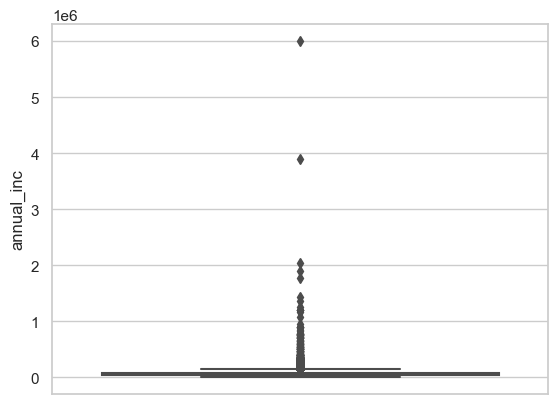

In [129]:
sns.boxplot(y="annual_inc",
            data=loan_df)

<Axes: ylabel='collection_recovery_fee'>

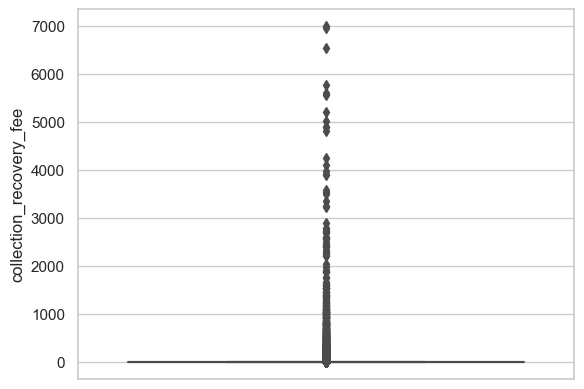

In [130]:
sns.boxplot(y="collection_recovery_fee",
            data=loan_df)

<Axes: ylabel='recoveries'>

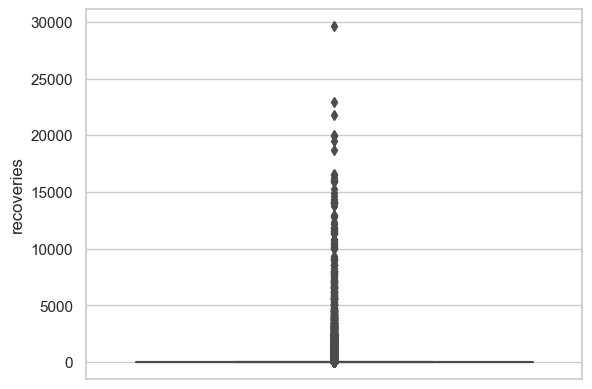

In [131]:
sns.boxplot(y="recoveries",
            data=loan_df)

<Axes: ylabel='total_rec_late_fee'>

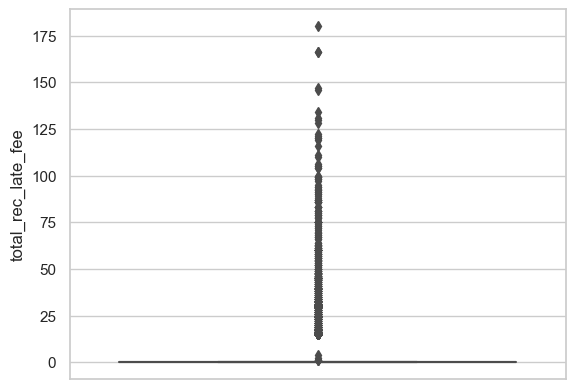

In [132]:
sns.boxplot(y="total_rec_late_fee",
            data=loan_df)

In [133]:
# Remove outliers for features
replace_with_thresholds(loan_df, "annual_inc")
replace_with_thresholds(loan_df, "collection_recovery_fee")
replace_with_thresholds(loan_df, "recoveries")
replace_with_thresholds(loan_df, "total_rec_late_fee")

In [134]:
percentile = [0,0.10, 0.25, 0.5 ,0.75 ,0.95, 1.0]
df_perctile = loan_df[continuous].quantile(percentile)

df_perctile

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate%,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util%,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,Years_borrower_in_cr_line,loan_defaulted
0.00,500.00,500.00,0.00,5.00,16.00,4000.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,1.00,1969.00,3.00,0.00
0.10,3100.00,3000.00,2825.00,7.00,99.00,30000.00,4.00,0.00,0.00,0.00,4.00,0.00,1101.00,8.00,9.00,2916.00,2415.00,2140.30,310.00,0.00,0.00,0.00,94.00,0.00,2009.00,2.00,1988.00,6.00,0.00
0.25,5300.00,5200.00,5000.00,9.00,166.00,40000.00,8.00,0.00,0.00,0.00,6.00,0.00,3649.00,25.00,13.00,5513.00,5019.00,4500.00,644.00,0.00,0.00,0.00,218.00,0.00,2010.00,4.00,1993.00,9.00,0.00
0.50,9600.00,9550.00,8728.00,12.00,278.00,58800.00,13.00,0.00,0.00,0.00,9.00,0.00,8757.00,49.00,20.00,9675.00,9066.50,8000.00,1301.00,0.00,0.00,0.00,569.00,0.00,2011.00,7.00,1998.00,12.00,0.00
0.75,15000.00,15000.00,14000.00,14.00,426.00,82000.00,19.00,0.00,21.00,0.00,12.00,0.00,16902.00,72.00,29.00,16131.50,15319.75,13150.00,2672.00,0.00,0.00,0.00,3448.25,0.00,2011.00,10.00,2001.00,17.00,0.00
0.95,25000.00,25000.00,24500.00,18.00,761.00,140004.00,24.00,1.00,64.00,45.45,17.00,1.00,41329.90,94.00,43.00,29619.90,28986.15,24261.25,6857.45,15.00,382.00,5.00,12370.00,0.00,2011.00,12.00,2006.00,27.00,1.00
1.00,35000.00,35000.00,35000.00,24.00,1305.00,314010.00,30.00,11.00,120.00,129.00,44.00,4.00,149588.00,100.00,90.00,58564.00,58564.00,35000.00,23564.00,37.50,955.00,12.50,36115.00,2.00,2011.00,12.00,2008.00,42.00,1.00


###  <font color='blue'>Recheck outliers post imputing the data</font> 

In [135]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    chk = (f"{col} :  {check_outlier(loan_df, col)}")
    if "True" in chk:
        print(f"{col} :  {check_outlier(loan_df, col)}")
    
    outliers.append(check_outlier(loan_df, col))
    
print(f"   \nOutliers detected? {np.array(outliers).any()}")

delinq_2yrs :  True
mths_since_last_record :  True
open_acc :  True
pub_rec :  True
revol_bal :  True
total_rec_int :  True
last_pymnt_amnt :  True
pub_rec_bankruptcies :  True
   
Outliers detected? True


In [136]:
loan_df[continuous].skew().sort_values(ascending = False).head(10)

total_rec_late_fee        5.07
delinq_2yrs               5.03
pub_rec_bankruptcies      4.58
pub_rec                   4.52
mths_since_last_record    4.26
recoveries                4.20
collection_recovery_fee   4.05
revol_bal                 3.22
total_rec_int             2.70
last_pymnt_amnt           2.66
dtype: float64

In [137]:
loan_df.duplicated().any()

False

### <font color='blue'>Data Distrubution</font> 

Data Distribution


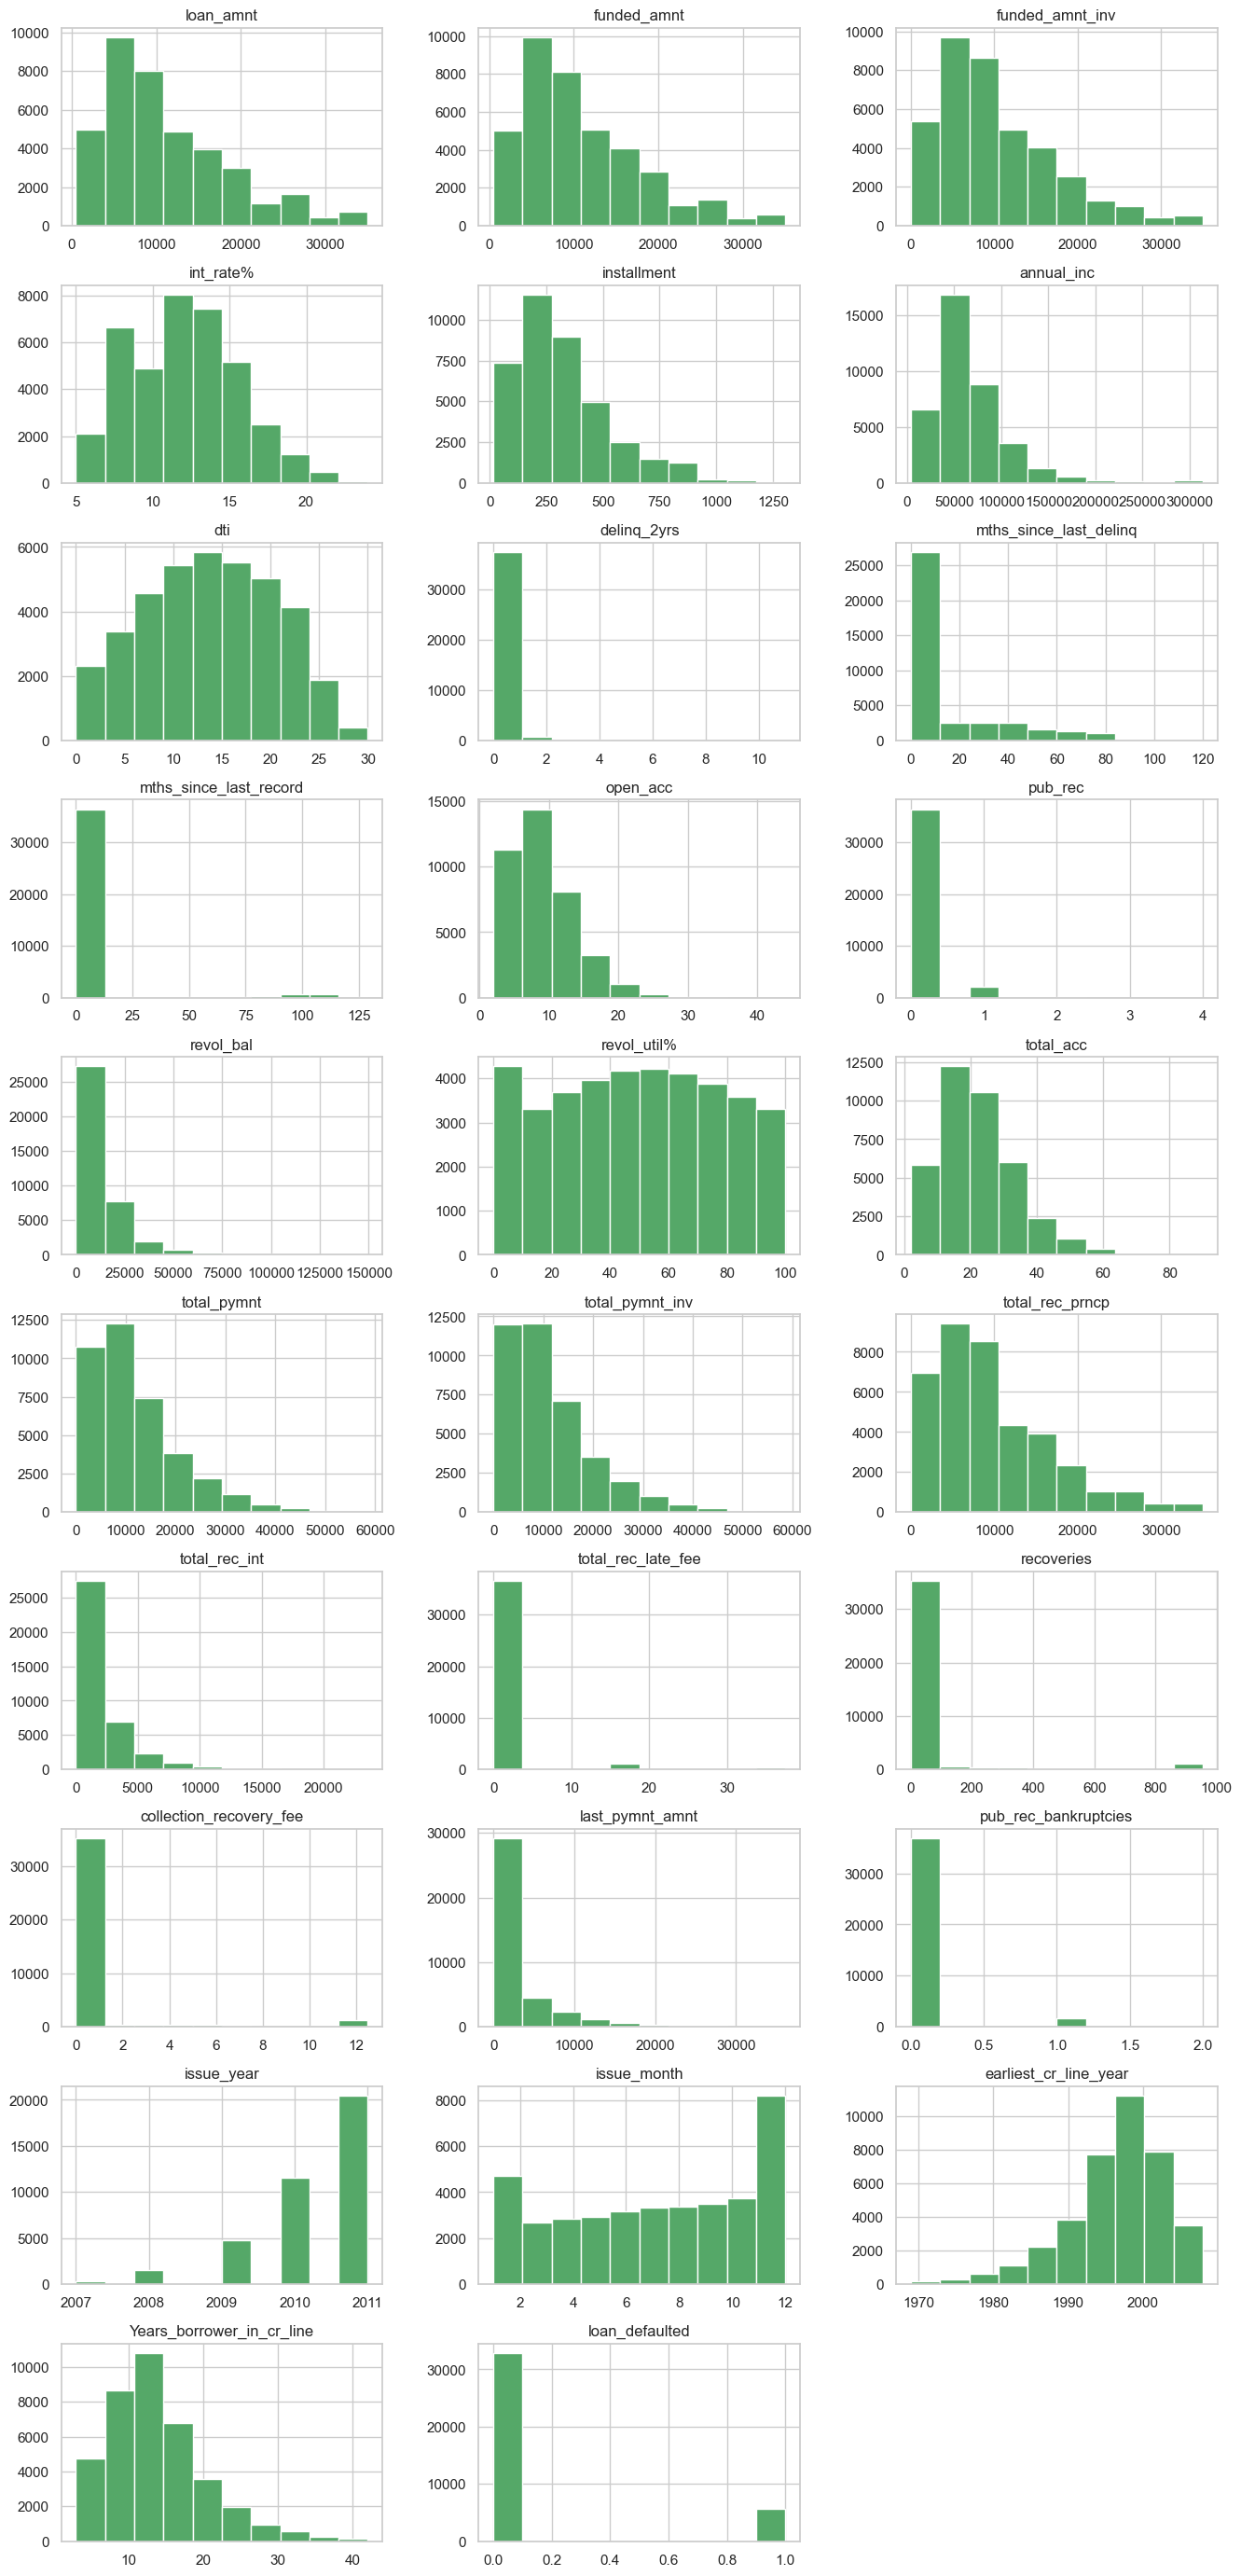

In [138]:
loan_df.hist(layout = (10,3), figsize=(16,35), color = 'g')
print('Data Distribution')

# <font color='Blue'>Univariate Analysis</font> 

In [139]:
loan_df[categorical].describe().round()

,term_in_months,grade,sub_grade,emp_length_years,home_ownership,verification_status,loan_status,purpose,addr_state,inq_last_6mths,last_pymnt_d,last_credit_pull_d,loan_amnt_catg,annual_inc_catg,int_rate_catg,dti_catg,Years_borrower_in_cr_line_catg
count,38492,38492,38492,38492,38492,38492,38492,38492,38492,38492,38492,38492,38492,38478,37949,37976,38492
unique,2,7,35,10,5,3,2,14,50,9,102,107,5,5,4,5,6
top,36,B,A4,10,RENT,Not Verified,Fully Paid,debt_consolidation,CA,0,Mar-13,May-16,0-7000,40000-60000,0-10,10-15,10-15
freq,29032,11651,2872,9477,18458,16660,32881,18026,6929,18656,1023,9317,14271,11239,13600,9627,12914


### <font color='blue'>Loan Term In Months</font> 

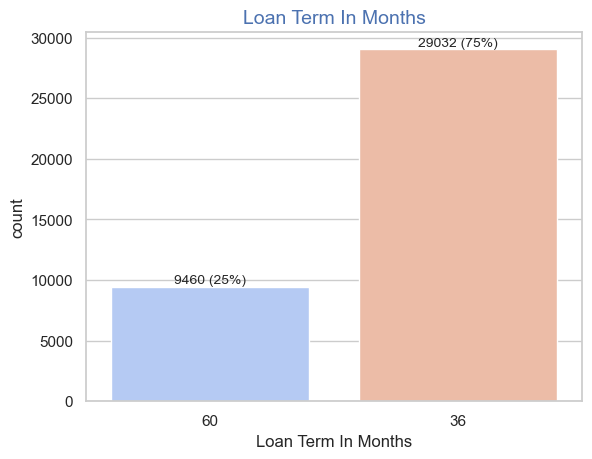

In [140]:
ax = sns.countplot(x=loan_df['term_in_months'], palette ='coolwarm',
                   order=loan_df['term_in_months'].value_counts(ascending=True).index);
        
abs_values = loan_df['term_in_months'].value_counts(ascending=True)
rel_values = loan_df['term_in_months'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Loan Term In Months")
plt.title('Loan Term In Months',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls, size=10)
plt.show()

## Observations: We have more cases of 36 months loan - 75%

### <font color='blue'>LC assigned loan grade</font> 

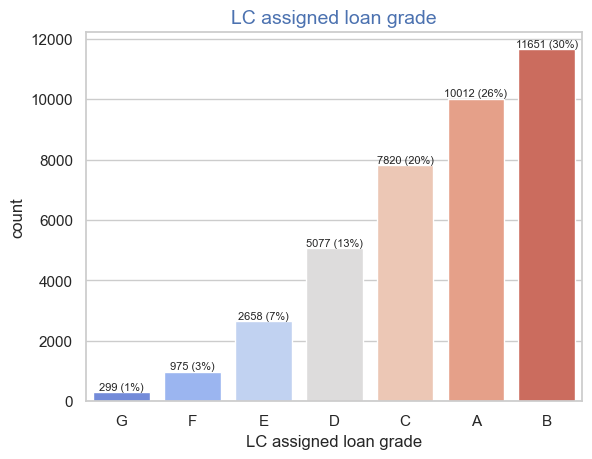

In [141]:
ax = sns.countplot(x=loan_df['grade'], palette ='coolwarm',
                   order=loan_df['grade'].value_counts(ascending=True).index);
        
abs_values = loan_df['grade'].value_counts(ascending=True)
rel_values = loan_df['grade'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("LC assigned loan grade")
plt.title('LC assigned loan grade',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls , size=8)

plt.show()

## Observations: We have more of A(26%) and B (30%) Loan Grades

### <font color='blue'>Employee Working Experience in Years</font> 

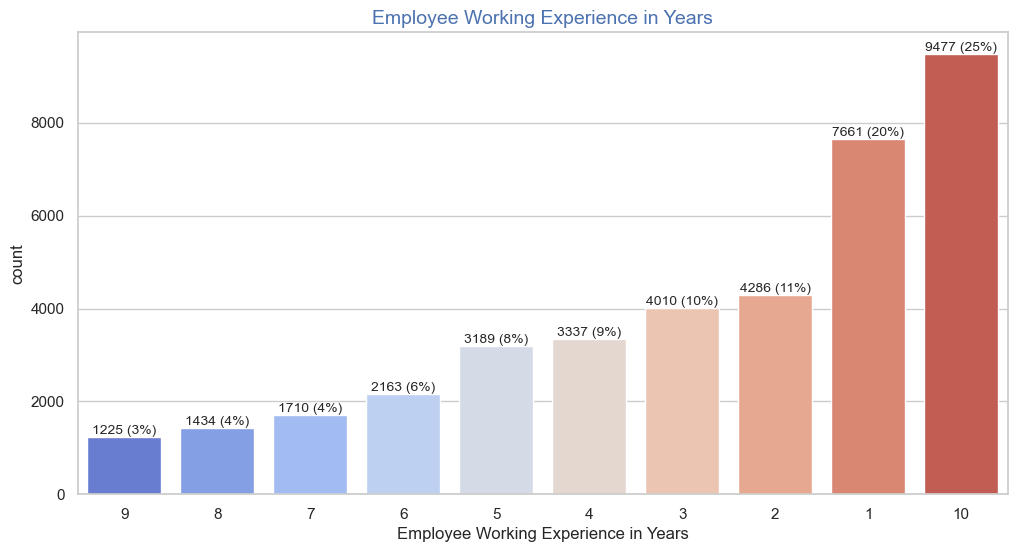

In [142]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(x=loan_df['emp_length_years'], palette ='coolwarm',
                   order=loan_df['emp_length_years'].value_counts(ascending=True).index);
        
abs_values = loan_df['emp_length_years'].value_counts(ascending=True)
rel_values = loan_df['emp_length_years'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Employee Working Experience in Years")
plt.title('Employee Working Experience in Years',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

# setting the dimensions of the plot

plt.show()

## Observations: We have more of 10 years(25%) and 1 year(20%) employee work experience

### <font color='blue'>Borrower Home Ownership</font> 

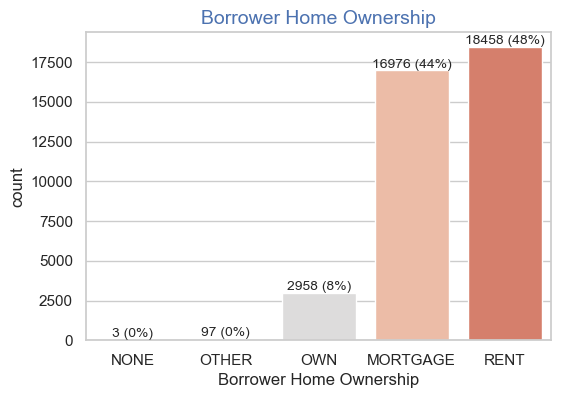

In [143]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.countplot(x=loan_df['home_ownership'], palette ='coolwarm',
                   order=loan_df['home_ownership'].value_counts(ascending=True).index);
        
abs_values = loan_df['home_ownership'].value_counts(ascending=True)
rel_values = loan_df['home_ownership'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Borrower Home Ownership")
plt.title('Borrower Home Ownership',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

# setting the dimensions of the plot

plt.show()

## Observations: We have more of Rent(48%) and 
## Mortgage(44%) type home ownership

### <font color='blue'>Income Verified by LC</font> 

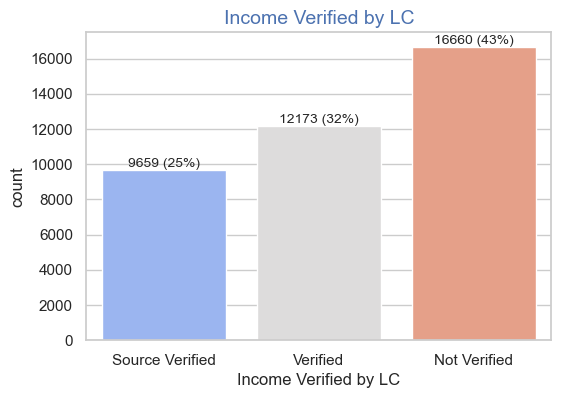

In [144]:
fig, ax = plt.subplots(figsize=(6, 4))


ax = sns.countplot(x=loan_df['verification_status'], palette ='coolwarm',
                   order=loan_df['verification_status'].value_counts(ascending=True).index);
        
abs_values = loan_df['verification_status'].value_counts(ascending=True)
rel_values = loan_df['verification_status'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Income Verified by LC")
plt.title('Income Verified by LC',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

# setting the dimensions of the plot

plt.show()

## Observations: We have more of Not_Verified(43%) as 
## Verification status

### <font color='blue'>Current status of the loan</font> 

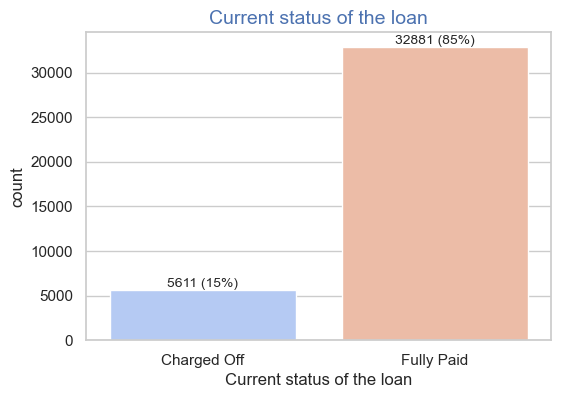

In [145]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.countplot(x=loan_df['loan_status'], palette ='coolwarm',
                   order=loan_df['loan_status'].value_counts(ascending=True).index);
        
abs_values = loan_df['loan_status'].value_counts(ascending=True)
rel_values = loan_df['loan_status'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Current status of the loan")
plt.title('Current status of the loan',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

plt.show()

## Observations: We have more of Fully Paid cases - 85%

### <font color='blue'>Purpose - category provided by the borrower for the loan request</font> 

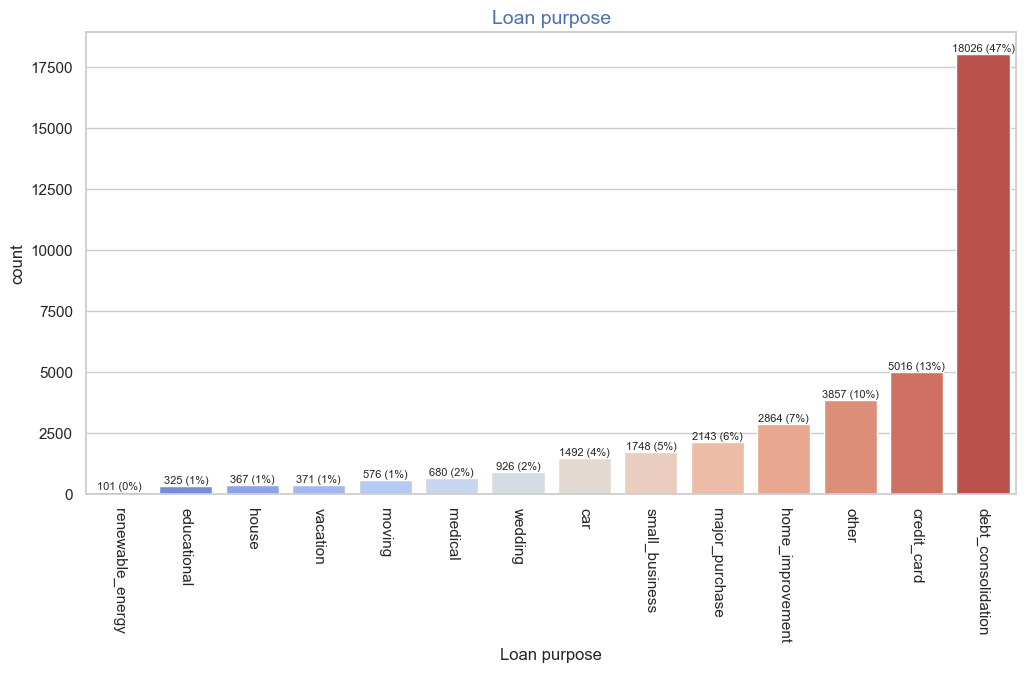

In [146]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax = sns.countplot(x=loan_df['purpose'], palette ='coolwarm',
                   order=loan_df['purpose'].value_counts(ascending=True).index);
        
abs_values = loan_df['purpose'].value_counts(ascending=True)
rel_values = loan_df['purpose'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Loan purpose")
plt.title('Loan purpose',fontsize=14,color = 'b')

plt.xticks(rotation=270)
ax.bar_label(container=ax.containers[0], labels=lbls , size=8)

plt.show()

## Observations: We have more of Debt Consolidation 47% & Credit Card 13%

### <font color='blue'>Borrower Address State in the loan application</font> 

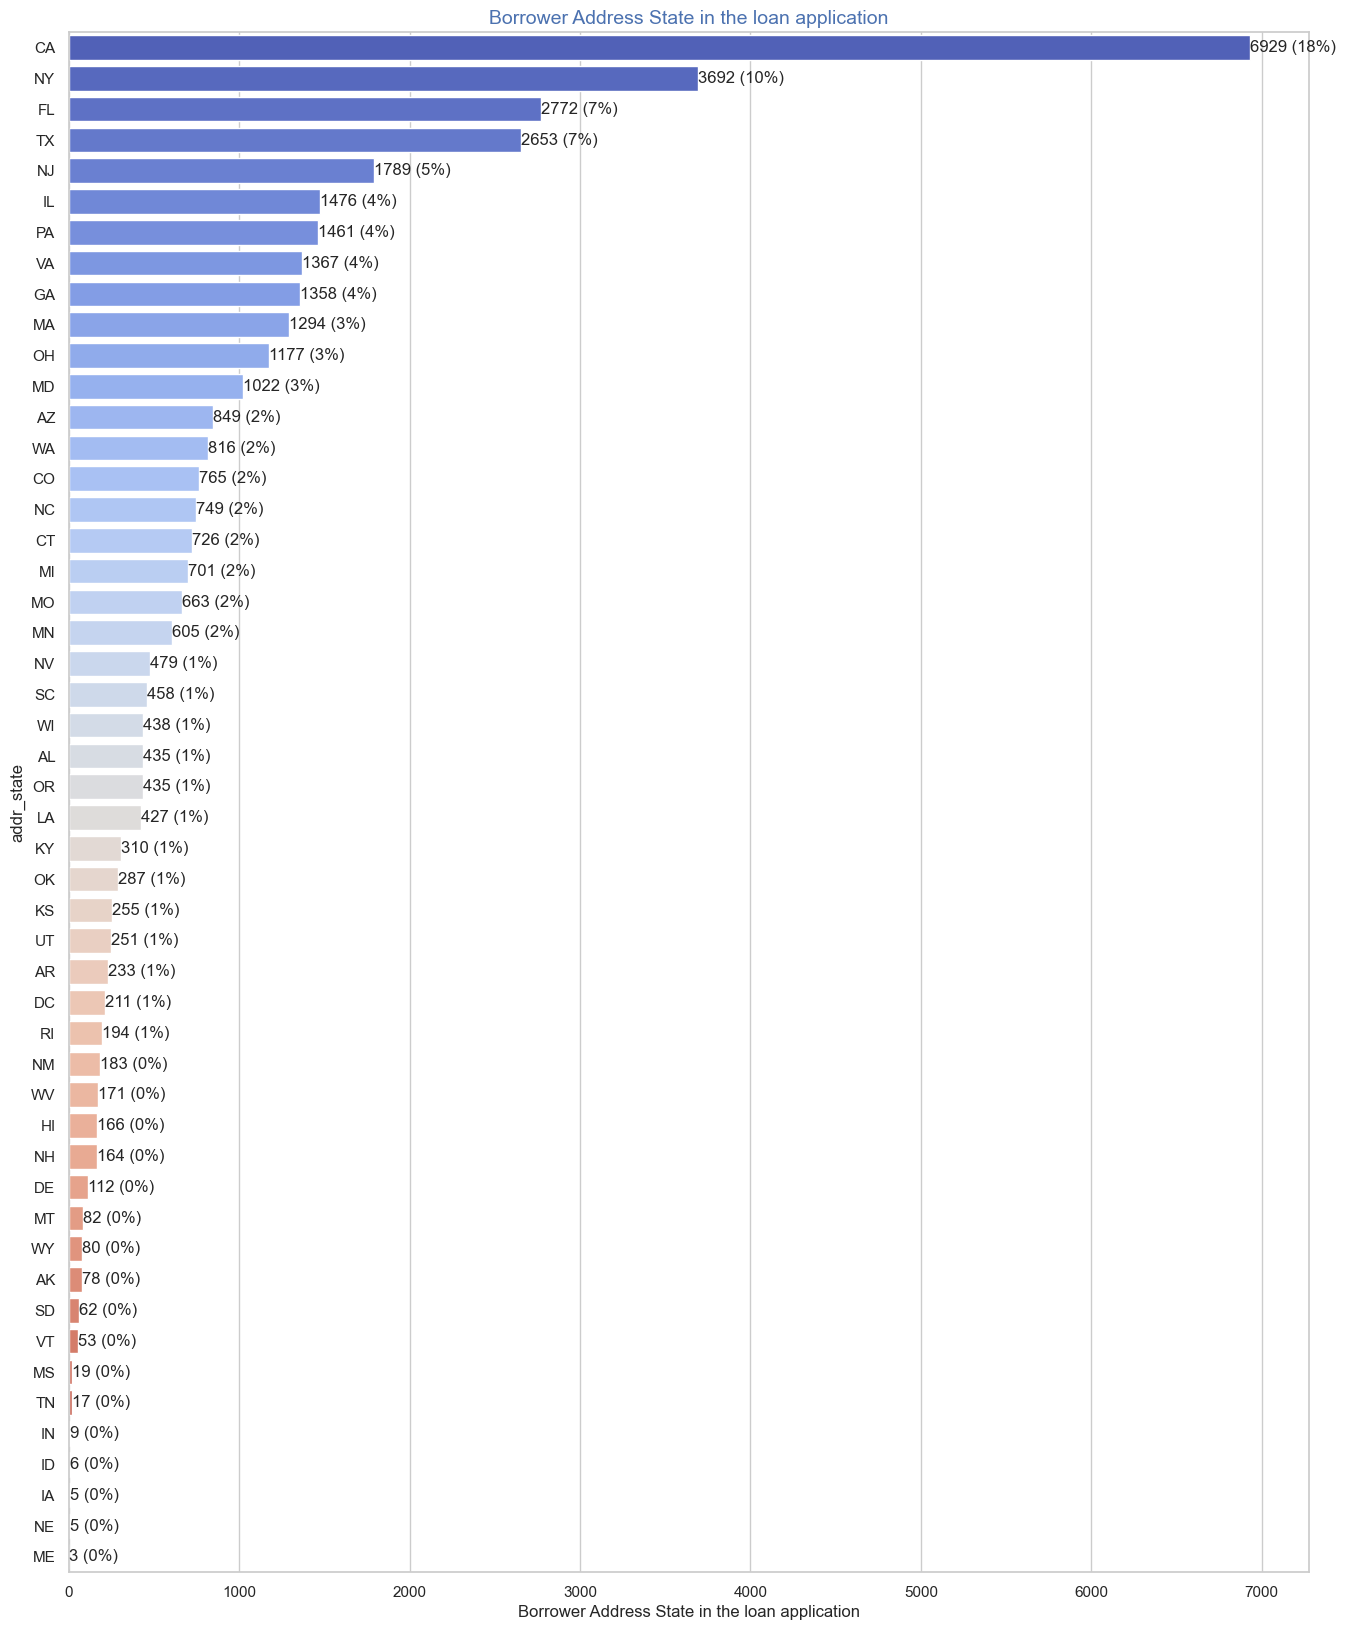

In [147]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(16, 20))


ax = sns.countplot(y=loan_df['addr_state'], palette ='coolwarm',
                   order=loan_df['addr_state'].value_counts(ascending=False).index);
        
abs_values = loan_df['addr_state'].value_counts(ascending=False)
rel_values = loan_df['addr_state'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Borrower Address State in the loan application")
plt.title('Borrower Address State in the loan application',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls , size=12)

plt.show()

## Observations: We have more of Loans from CA(18%) and NY(10%)

### <font color='blue'>Loan Amount</font> 

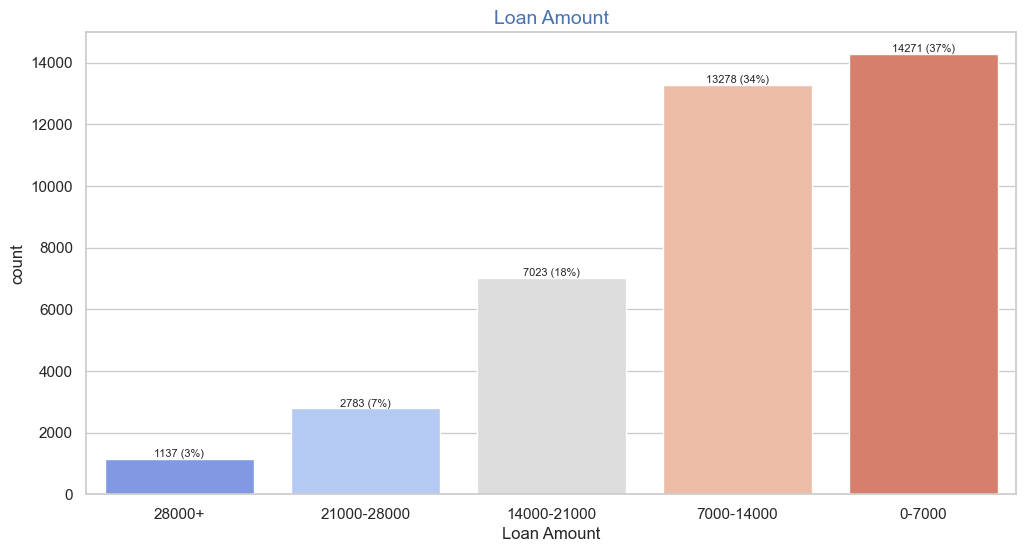

In [148]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax = sns.countplot(x=loan_df['loan_amnt_catg'], palette ='coolwarm',
                   order=loan_df['loan_amnt_catg'].value_counts(ascending=True).index);
        
abs_values = loan_df['loan_amnt_catg'].value_counts(ascending=True)
rel_values = loan_df['loan_amnt_catg'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Loan Amount")
plt.title('Loan Amount',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls , size=8)

plt.show()

##         Observations: We have more of Loans of 0-7000(37%) and 7000-14000(34%)

### <font color='blue'>Annual Income (The self-reported annual income provided by the borrower during registration)</font> 

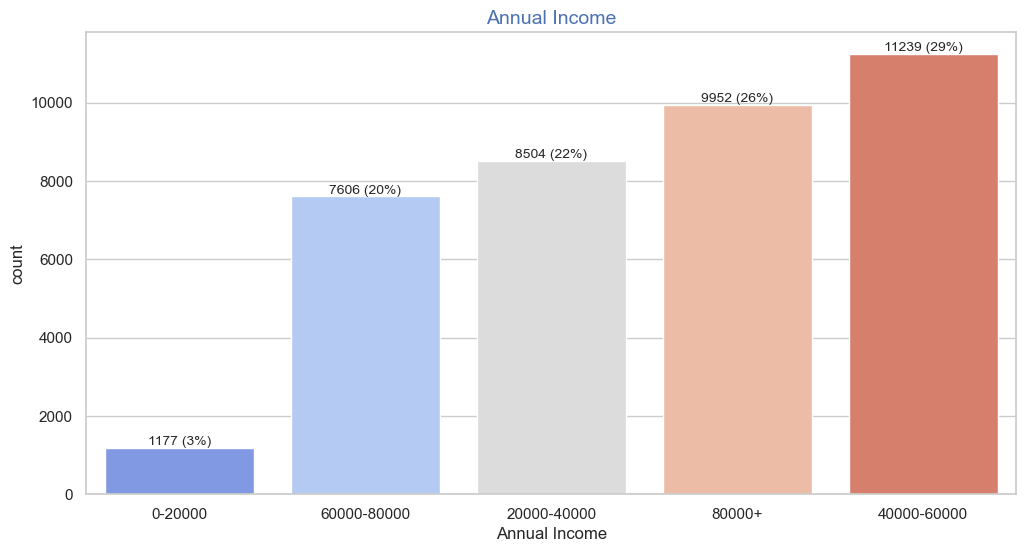

In [149]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax = sns.countplot(x=loan_df['annual_inc_catg'], palette ='coolwarm',
                   order=loan_df['annual_inc_catg'].value_counts(ascending=True).index);
        
abs_values = loan_df['annual_inc_catg'].value_counts(ascending=True)
rel_values = loan_df['annual_inc_catg'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Annual Income")
plt.title('Annual Income',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

plt.show()

## Observations: We have more of Annual Income of 40-60k(29%) and 80k+(26%)

### <font color='blue'>Interest Rate on the loan</font> 

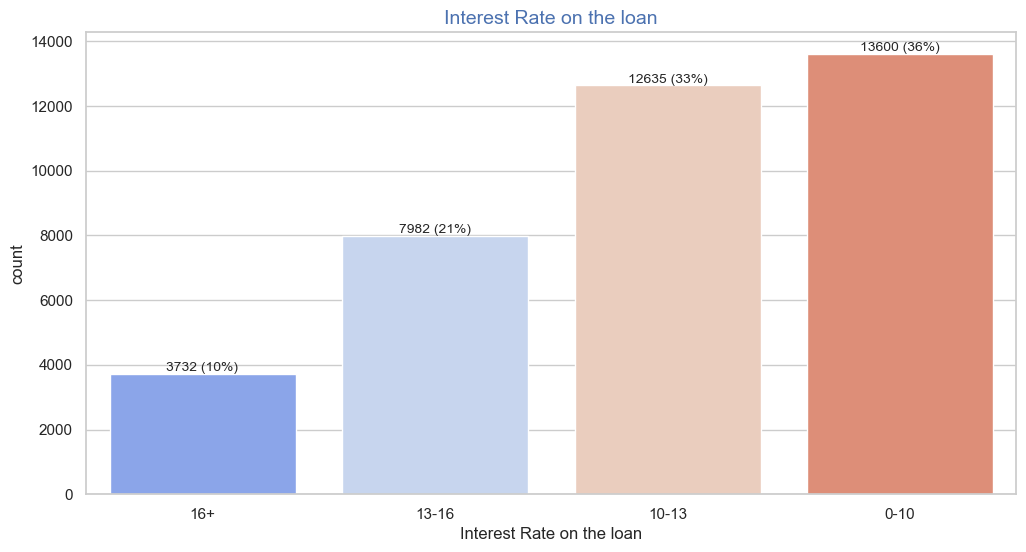

In [150]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax = sns.countplot(x=loan_df['int_rate_catg'], palette ='coolwarm',
                   order=loan_df['int_rate_catg'].value_counts(ascending=True).index);
        
abs_values = loan_df['int_rate_catg'].value_counts(ascending=True)
rel_values = loan_df['int_rate_catg'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Interest Rate on the loan")
plt.title('Interest Rate on the loan',fontsize=14,color = 'b')

ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

plt.show()

## Observations: We have more of Interest Rate of 0-10%(36%) and 10-13%(33%)

###  <font color='blue'>Debt-to-income (DTI) ratio</font> 

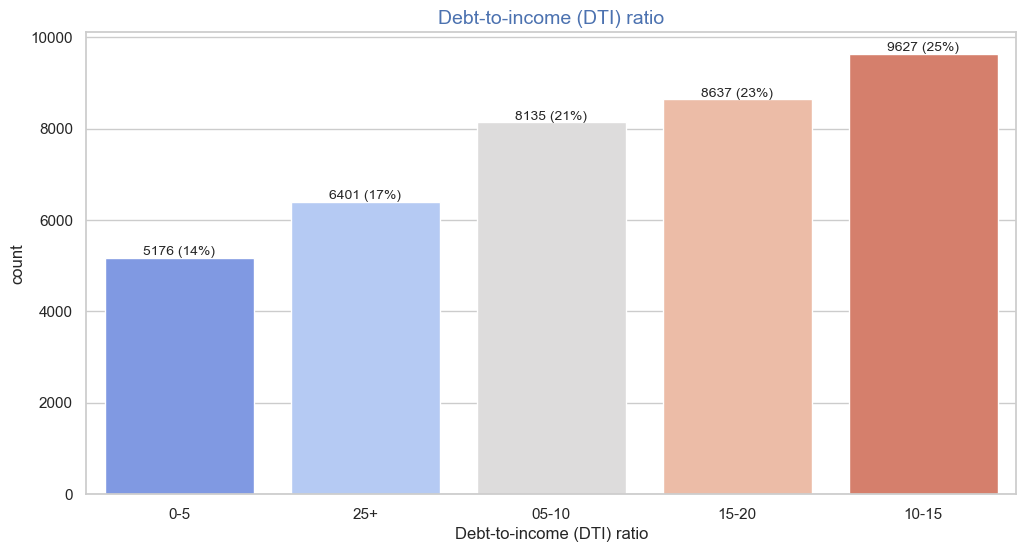

In [151]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax = sns.countplot(x=loan_df['dti_catg'], palette ='coolwarm',
                   order=loan_df['dti_catg'].value_counts(ascending=True).index);
        
abs_values = loan_df['dti_catg'].value_counts(ascending=True)
rel_values = loan_df['dti_catg'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Debt-to-income (DTI) ratio")
plt.title('Debt-to-income (DTI) ratio',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

plt.show()

## Observations: We have more of dti of 10-15(25%) and 15-20(23%)

###  <font color='blue'>Years_borrower_in_cr_line_catg</font> 

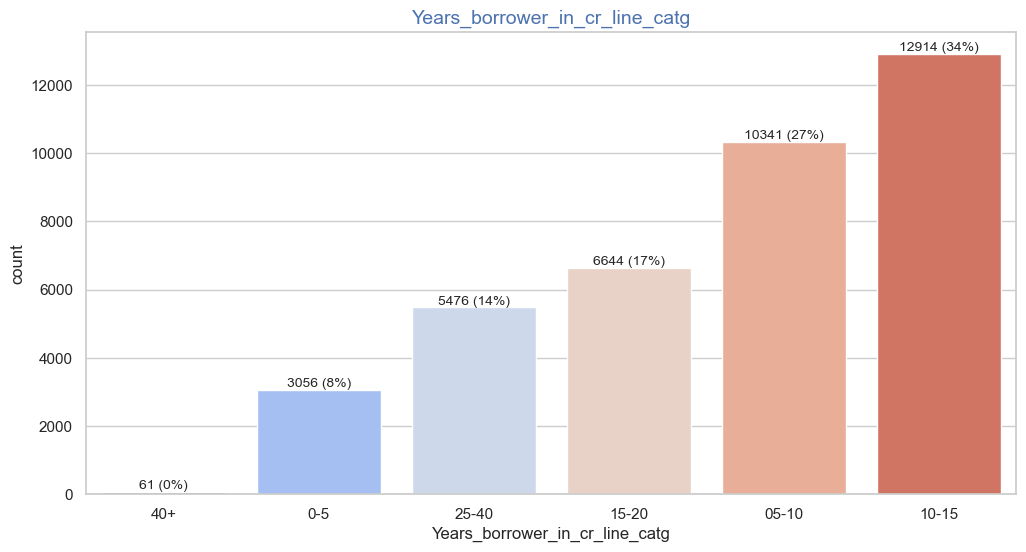

In [152]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(x=loan_df['Years_borrower_in_cr_line_catg'], palette ='coolwarm',
                   order=loan_df['Years_borrower_in_cr_line_catg'].value_counts(ascending=True).index);
        
abs_values = loan_df['Years_borrower_in_cr_line_catg'].value_counts(ascending=True)
rel_values = loan_df['Years_borrower_in_cr_line_catg'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
plt.xlabel("Years_borrower_in_cr_line_catg")
plt.title('Years_borrower_in_cr_line_catg',fontsize=14,color = 'b')


ax.bar_label(container=ax.containers[0], labels=lbls , size=10)

plt.show()

## Observations: We have more of borrower with credit history of 10-15 years(34%) and 5-10(27%)

# <font color='Blue'>Bivariate Analysis:</font> 

In [153]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_catg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_catg,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,236,941,1177,0.20
1,20000-40000,1510,6994,8504,0.18
2,40000-60000,1724,9515,11239,0.15
3,60000-80000,1023,6583,7606,0.13
4,80000+,1117,8835,9952,0.11


<Figure size 1000x500 with 0 Axes>

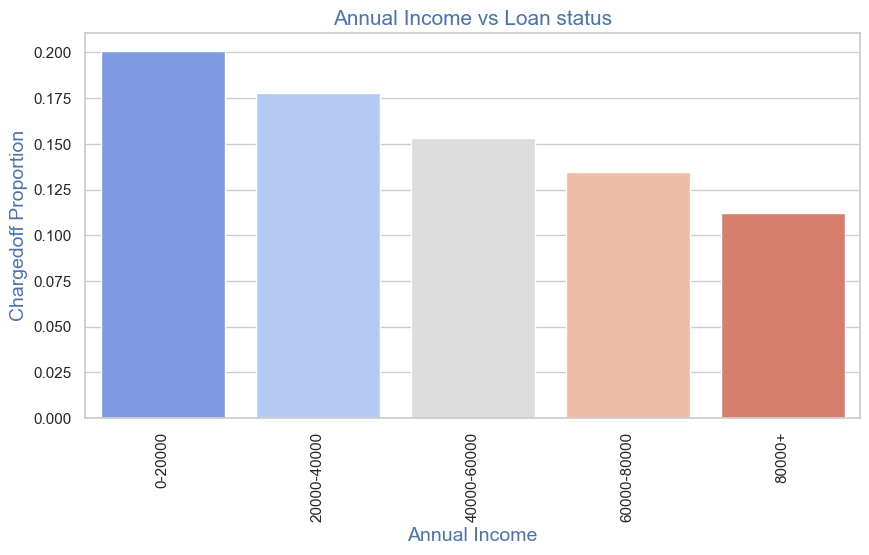

In [154]:
# Loan Defaulter(s) analysis with respect to Annual income and Loan status
# Create a barplot with Annual Income against Laon defaulted
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
rates = pd.qcut(loan_df['annual_inc'], 10)
df = pd.DataFrame({ 'annual_inc' : rates, 'loan_defaulted' : loan_df['loan_defaulted']})

fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='w')
ax1.set_title('Annual Income vs Loan status',fontsize=15,color = 'b')
ax1=sns.barplot(y= 'Chargedoff_Proportion', x='annual_inc_catg', data=inc_range_vs_loan, palette ='coolwarm', errorbar=None)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.xticks(rotation=90)
plt.show()

## Observation: Borrower with low income seens to have more Loan Defaulter(s) 

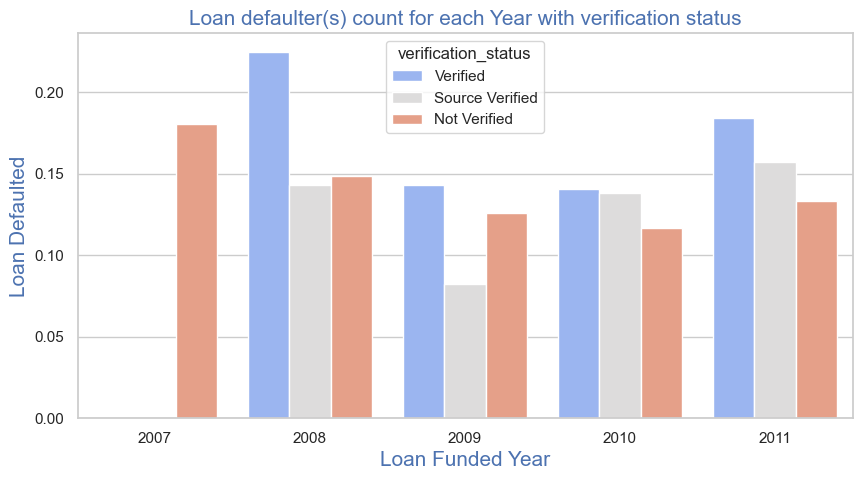

In [155]:
# Loan Defaulter(s) analysis with respect to year of loan granted and verification status.
# Plot a bar plot with loan_defaulted against loan_funded_year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=loan_df, y='loan_defaulted', x='issue_year',hue='verification_status', palette ='coolwarm', errorbar=None)
plt.title('Loan defaulter(s) count for each Year with verification status',fontsize=15,color = 'b')
plt.xlabel('Loan Funded Year',fontsize=15,color = 'b')
plt.ylabel('Loan Defaulted',fontsize=15,color = 'b')
plt.show()

## Observations: Increasing number of defaulters over the year 2008. Number of defaulters have increased during 2008 - may be due to Global economy recession.

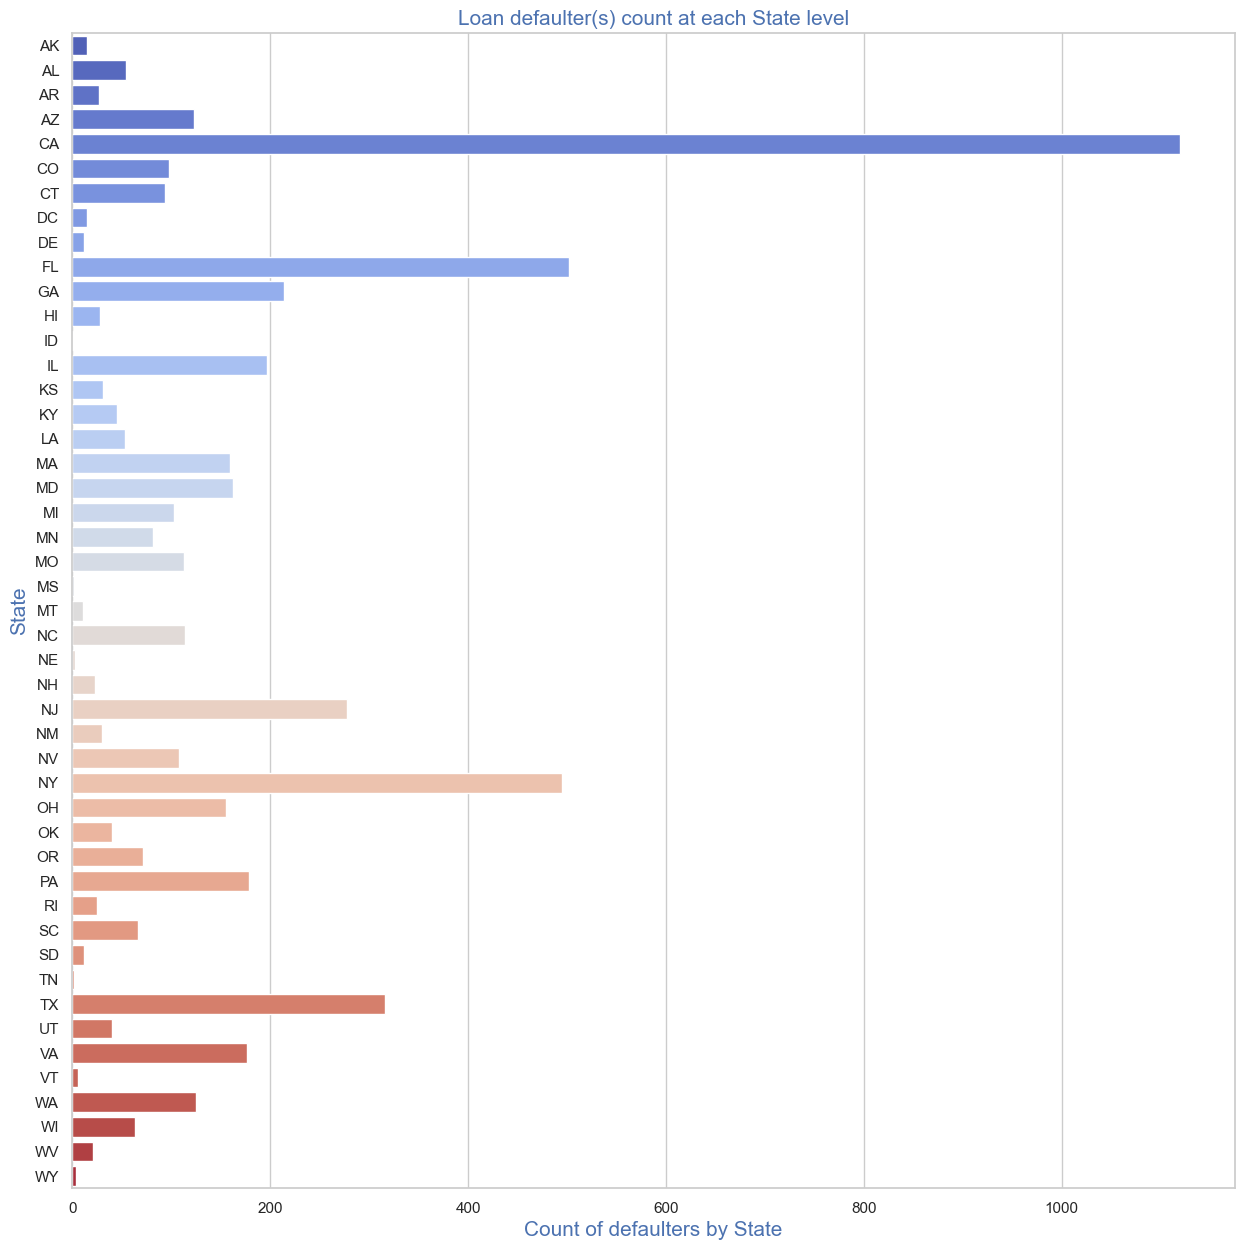

In [156]:
# Loan Defaulter(s) analysis with respect to individual state(s) level.
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
dataset = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
sns.barplot(y='addr_state', x='loan_status', data=dataset, palette='coolwarm')
plt.title('Loan defaulter(s) count at each State level',fontsize=15,color = 'b')
plt.xlabel('Count of defaulters by State',fontsize=15,color = 'b')
plt.ylabel('State',fontsize=15,color = 'b')
plt.show()

## Observations : Califorinia (CA) , Florida (FL) and New York (NY) are top 3 states with more Loan defaulters count.

In [157]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,473,1275,1748,0.27
10,renewable_energy,19,82,101,0.19
3,educational,56,269,325,0.17
9,other,632,3225,3857,0.16
5,house,59,308,367,0.16
8,moving,92,484,576,0.16
7,medical,106,574,680,0.16
2,debt_consolidation,2761,15265,18026,0.15
12,vacation,52,319,371,0.14
4,home_improvement,344,2520,2864,0.12


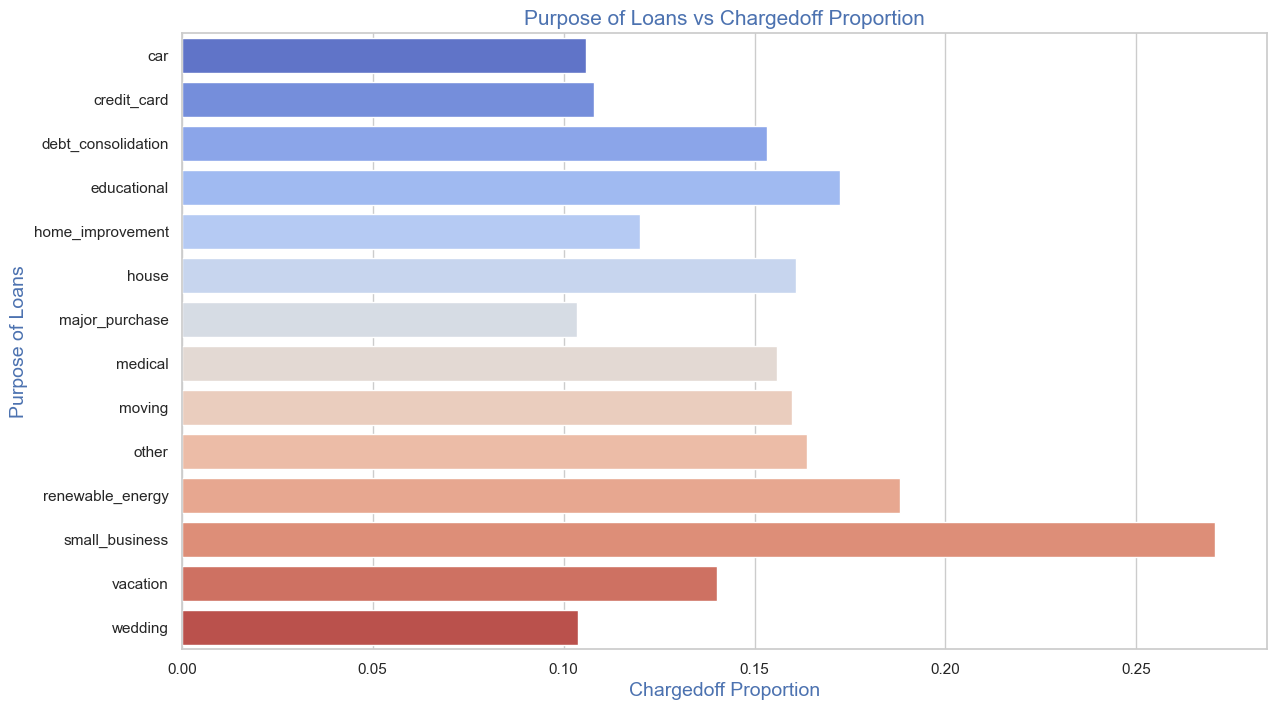

In [158]:
# Loan defaulter analysis with respect to Purpose of Loans
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
sns.set(style="whitegrid")
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan, palette='coolwarm')
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

## Observations: Small Business loans seems to have higher loan Defaulters.

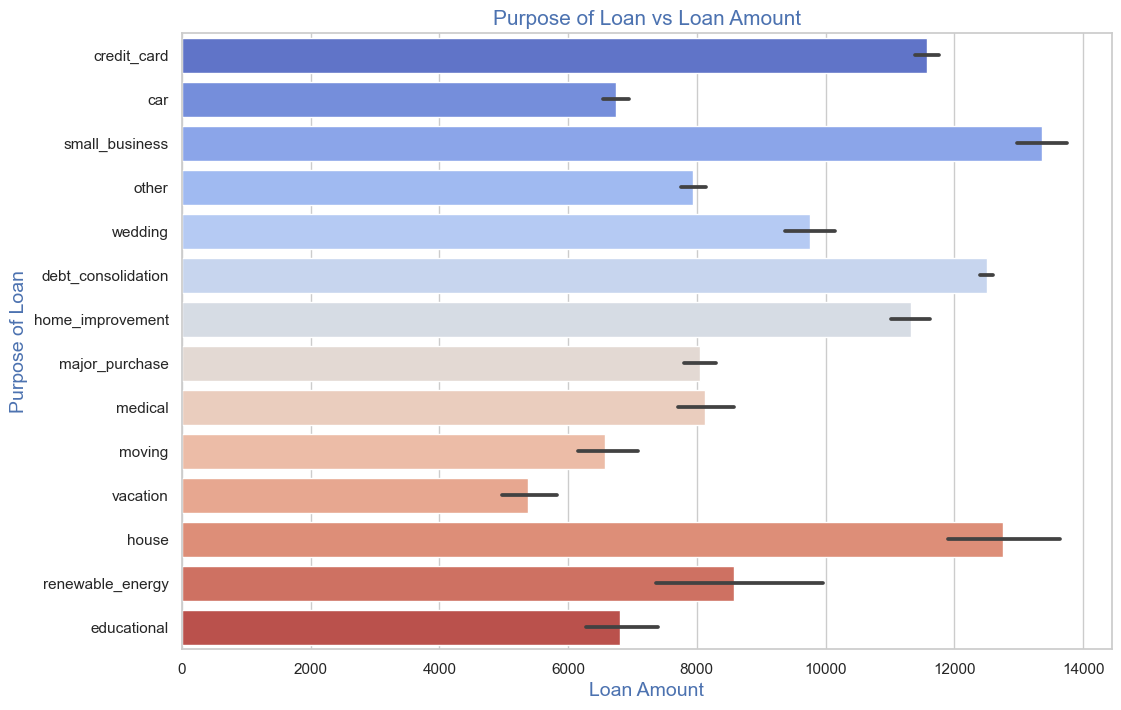

In [159]:
# Puprose of loan vs Loan amount analysis at Box plot level

plt.figure(figsize=(12,8),facecolor='w')
ax = sns.barplot(y='purpose', x='loan_amnt', data =loan_df,palette='coolwarm')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'b')
plt.show()

## Observations: Small Business applicants have high chances of getting charged off as their revenue generation may be low.

In [160]:
# Borrower's Grade Vs Chargedoff_Proportion analysis:
grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,101,198,299,0.34
5,F,319,656,975,0.33
4,E,714,1944,2658,0.27
3,D,1116,3961,5077,0.22
2,C,1344,6476,7820,0.17
1,B,1418,10233,11651,0.12
0,A,599,9413,10012,0.06


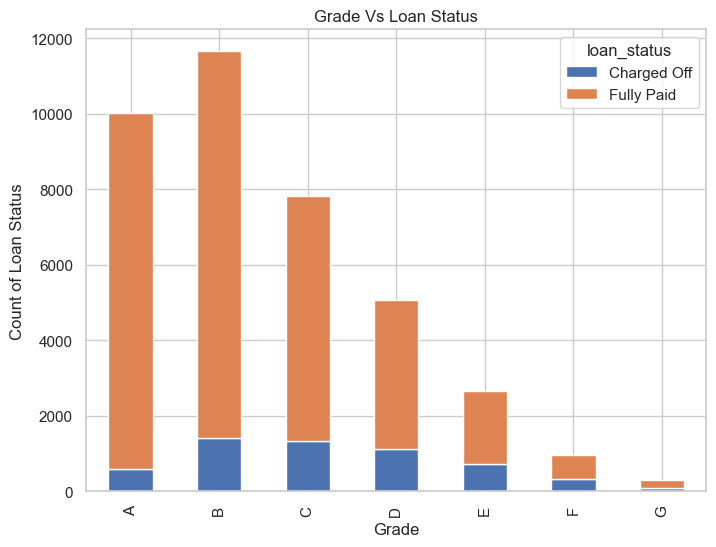

In [161]:
Loan_Temp = pd.pivot_table(data=loan_df, index=loan_df["grade"], columns=loan_df["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[8,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Grade")
plt.title("Grade Vs Loan Status") 
plt.show()

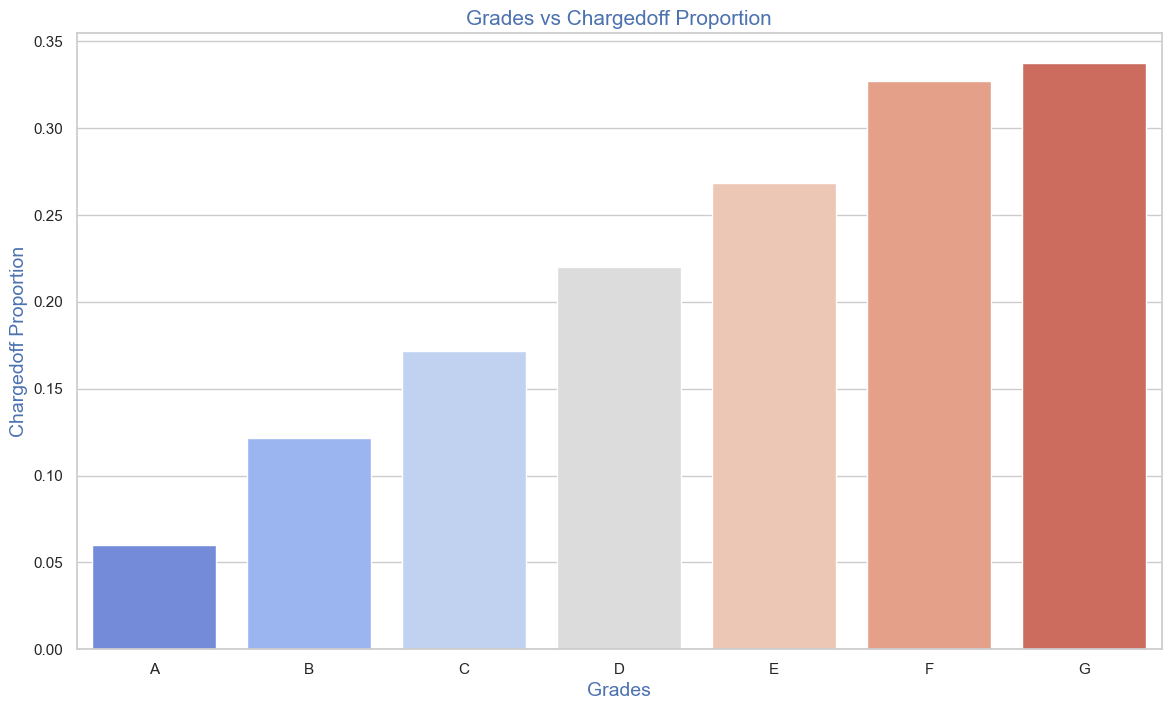

In [162]:
# Borrower's Grade Vs Chargedoff_Proportion analysis:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan, palette='coolwarm')
ax1.set_xlabel('Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='b')
plt.show()

## Observations:  Grade "A" has very less chances of charged off. Grade "F" and "G" have very high chances of charged off. Chances of charged off is increasing with grade moving from "A" towards "G"

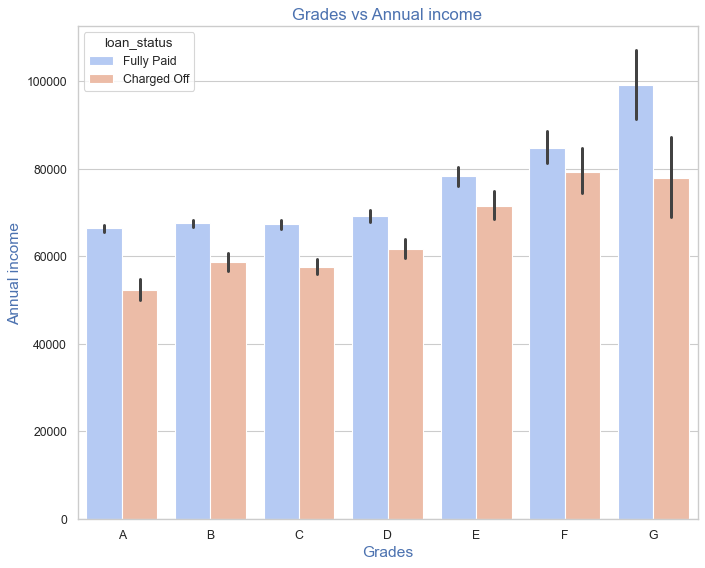

In [163]:
# Annual income Vs Grade for every loan status.
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_df, palette='coolwarm', estimator=np.mean,order='ABCDEFG')
ax.set_title('Grades vs Annual income',fontsize=15,color='b')
ax.set_ylabel('Annual income',fontsize=14,color = 'b')
ax.set_xlabel('Grades',fontsize=14,color = 'b')
plt.show()

## Observations:  'Charged off' is happening at Grade F than compared to other Grades

In [164]:
# sub grades Vs Chargedoff_Proportion

grade_vs_loan = loan_df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,54,58,112,0.48
32,G3,19,26,45,0.42
31,G2,28,49,77,0.36
28,F4,53,98,151,0.35
34,G5,10,19,29,0.34
30,G1,31,63,94,0.33
26,F2,70,163,233,0.30
25,F1,91,214,305,0.30
23,E4,126,297,423,0.30
27,F3,51,123,174,0.29


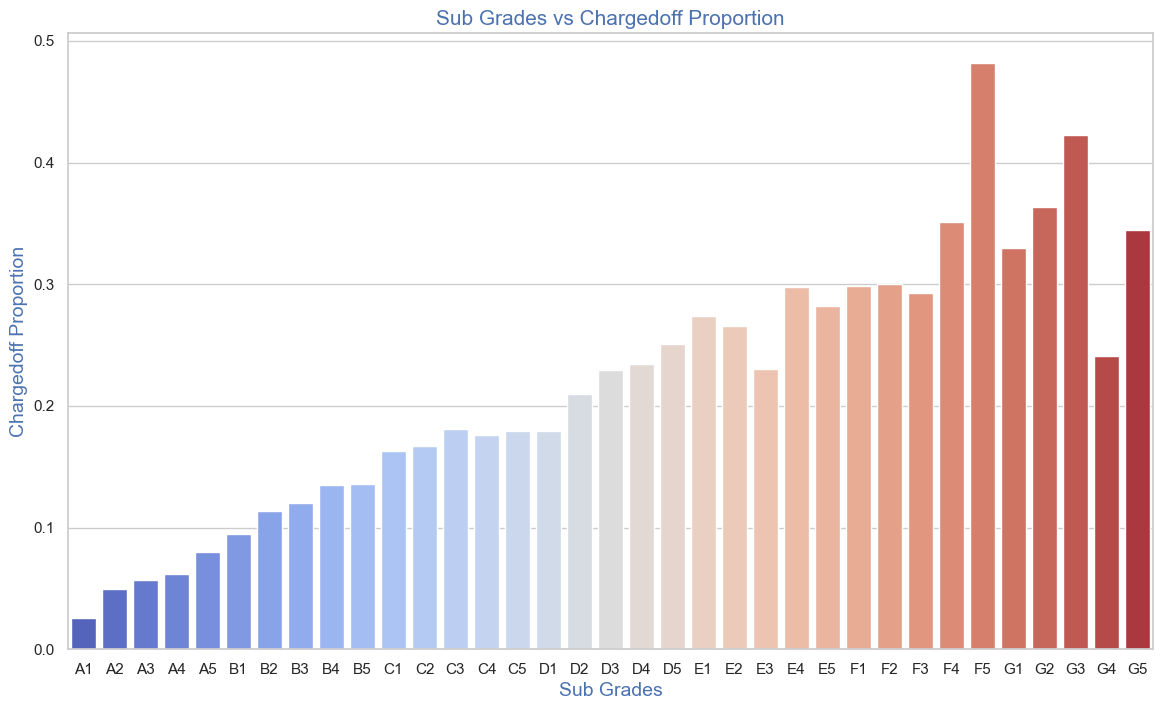

In [165]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan, palette='coolwarm')
ax1.set_xlabel('Sub Grades',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

## Observations: Sub Grades of "A" has very less chances of charged off. Sub Grades of "F" and "G" have very high chances of charged off.

In [166]:
# Employment length Vs Chargedoff_Proportion

emplen_vs_loan = loan_df.groupby(['emp_length_years', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length_years,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10,1549,7928,9477,0.16
7,7,263,1447,1710,0.15
5,5,457,2732,3189,0.14
0,1,1092,6569,7661,0.14
8,8,203,1231,1434,0.14
6,6,306,1857,2163,0.14
4,4,462,2875,3337,0.14
3,3,555,3455,4010,0.14
2,2,566,3720,4286,0.13
9,9,158,1067,1225,0.13


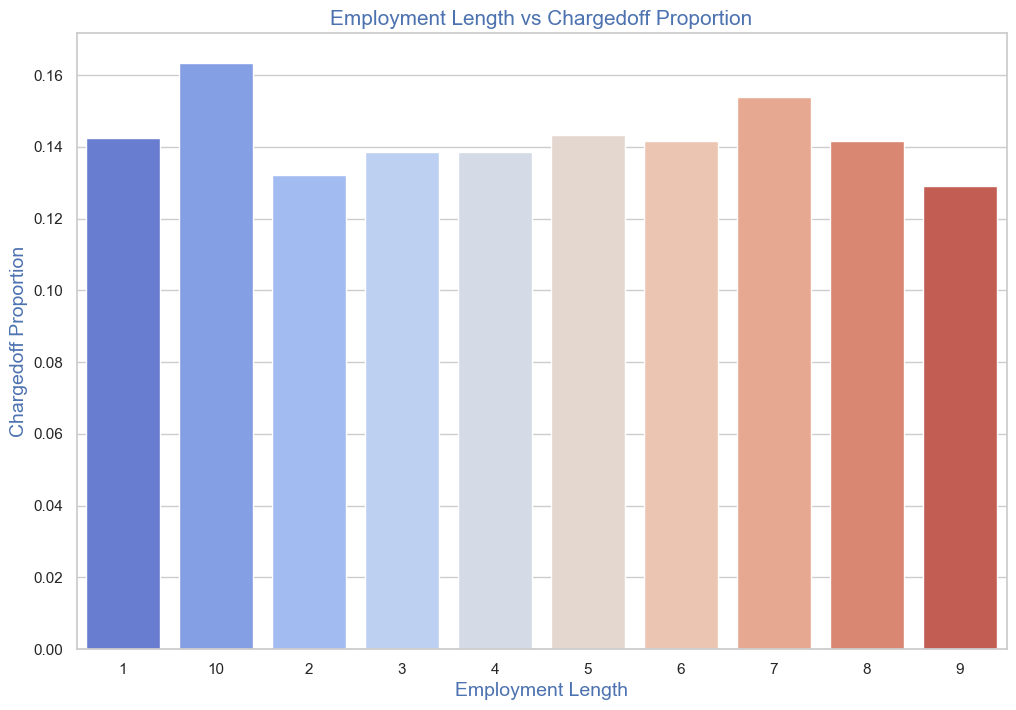

In [167]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='emp_length_years', y='Chargedoff_Proportion', data=emplen_vs_loan, palette='coolwarm')
ax1.set_xlabel('Employment Length',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()


## Observations:  < 1 year of work experience have high chances of getting charged off since their income will be less to repay loan.

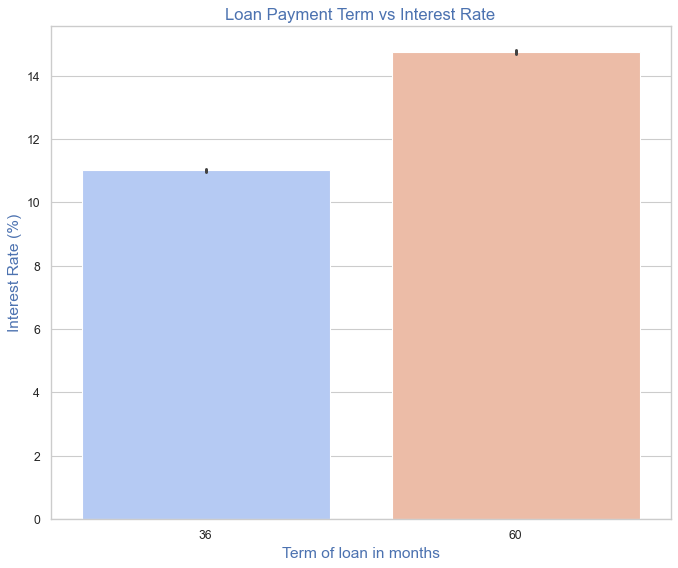

In [168]:
# Interest Rate Vs Payment Term in months for every loan status.
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(y='int_rate%', x='term_in_months', data =loan_df,palette='coolwarm')
ax.set_title('Loan Payment Term vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate (%)',fontsize=14,color = 'b')
ax.set_xlabel('Term of loan in months',fontsize=14,color = 'b')
plt.show()

## Observations: Interest rate is higher for 60 months loan term. Loans issued for longer term had higher interest rates for repayement

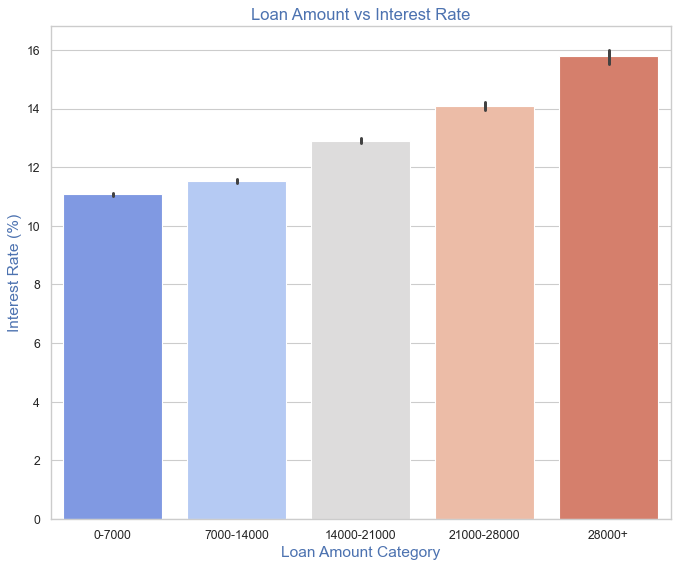

In [169]:
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(y='int_rate%', x='loan_amnt_catg', data =loan_df,palette='coolwarm')
ax.set_title('Loan Amount vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate (%)',fontsize=14,color = 'b')
ax.set_xlabel('Loan Amount Category',fontsize=14,color = 'b')
plt.show()

## Observations: Interest rate is increasing with loan amount increase.

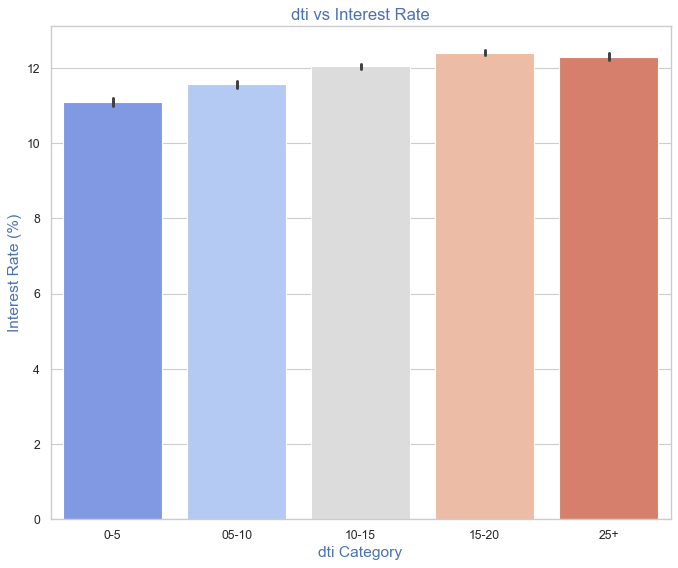

In [170]:
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(y='int_rate%', x='dti_catg', data =loan_df,palette='coolwarm')
ax.set_title('dti vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate (%)',fontsize=14,color = 'b')
ax.set_xlabel('dti Category',fontsize=14,color = 'b')
plt.show()

## Observations: Borrower with Low "dti" may get a lower Interest rate. Slight Increase in Interest rate with increase in "dti".

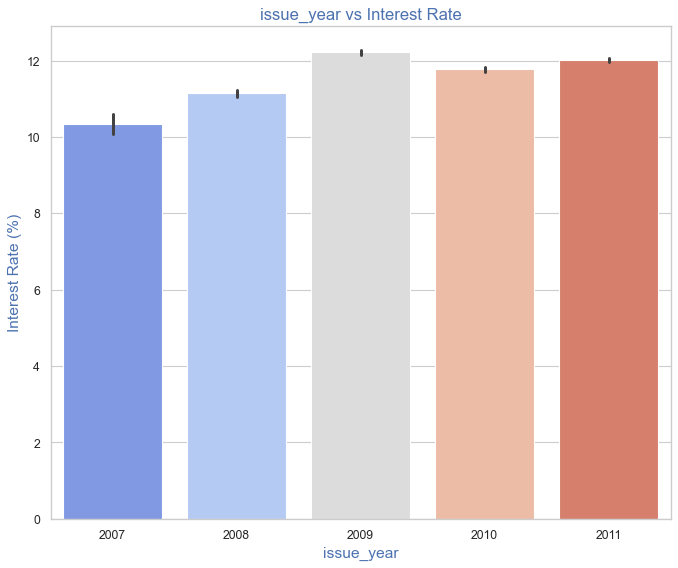

In [171]:
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(y='int_rate%', x='issue_year', data =loan_df,palette='coolwarm')
ax.set_title('issue_year vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate (%)',fontsize=14,color = 'b')
ax.set_xlabel('issue_year',fontsize=14,color = 'b')
plt.show()

## Observations: Year on Year Interest rate is increasing slowly.

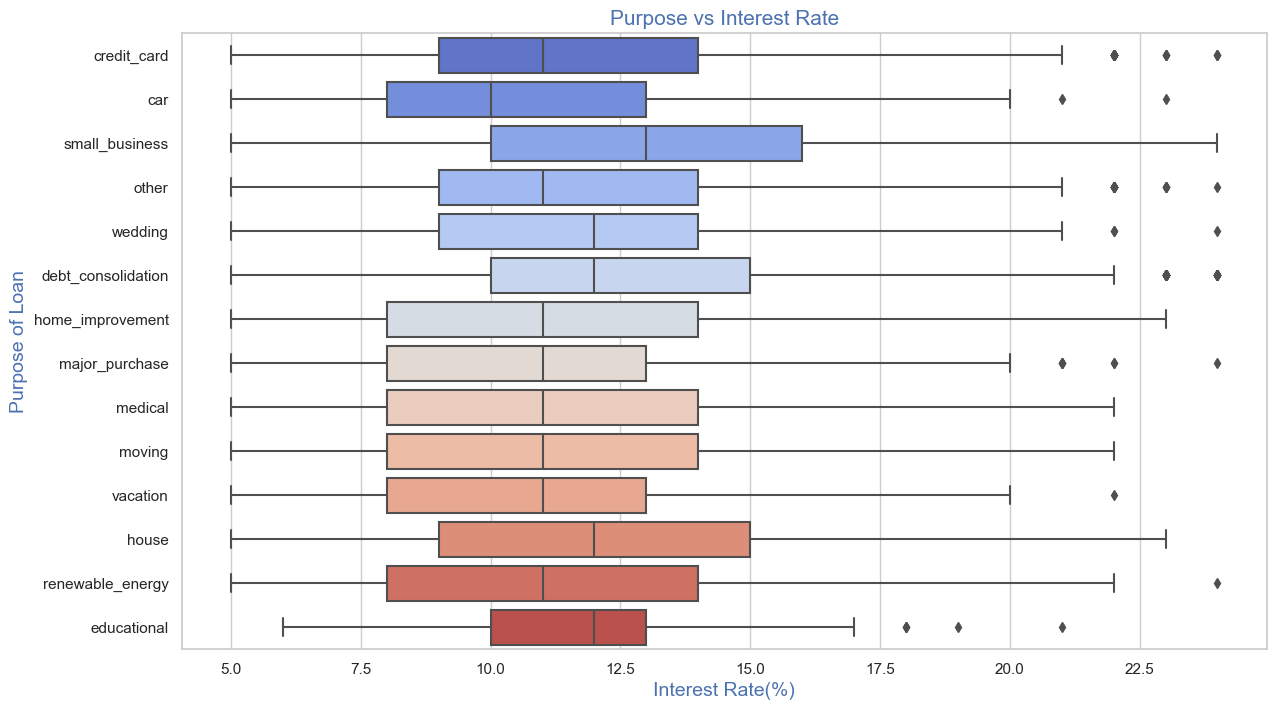

In [172]:
#Bivariate Analysis : Purpose Vs Interest Rate
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.boxplot(x='int_rate%', y='purpose', data =loan_df,palette='coolwarm')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='b')
ax.set_xlabel('Interest Rate(%)',fontsize=14,color = 'b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
plt.show()

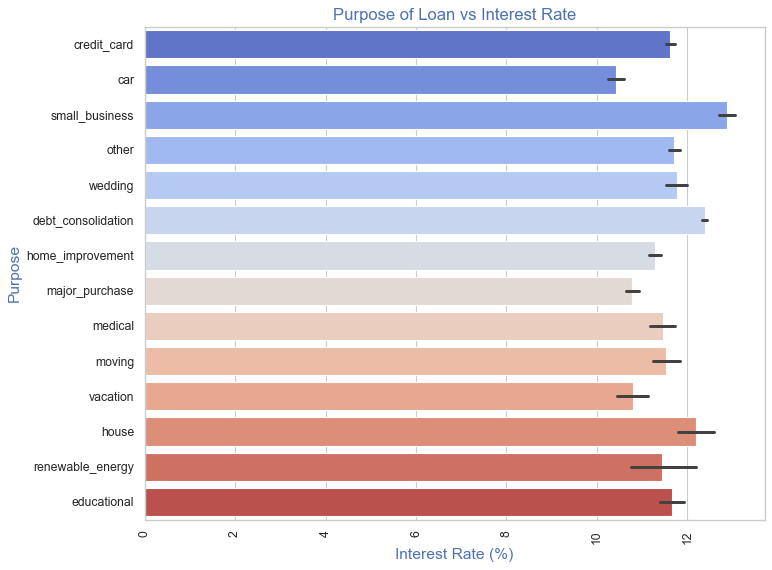

In [173]:
#Bivariate Analysis : Purpose Vs Interest Rate
plt.figure(figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(x='int_rate%', y='purpose', data =loan_df,palette='coolwarm')
ax.set_title('Purpose of Loan vs Interest Rate',fontsize=15,color='b')
ax.set_xlabel('Interest Rate (%)',fontsize=14,color = 'b')
ax.set_ylabel('Purpose',fontsize=14,color = 'b')
plt.xticks(rotation=90)
plt.show()

## Observations: Interest rate is highest for small business purpose. Debt consolidation falls under 2nd where borrowers had to pay more interest rate.

In [174]:
interest_vs_loan = loan_df.groupby(['int_rate_catg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_catg,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16+,1064,2668,3732,0.29
2,13-16,1550,6432,7982,0.19
1,10-13,1804,10831,12635,0.14
0,0-10,976,12624,13600,0.07


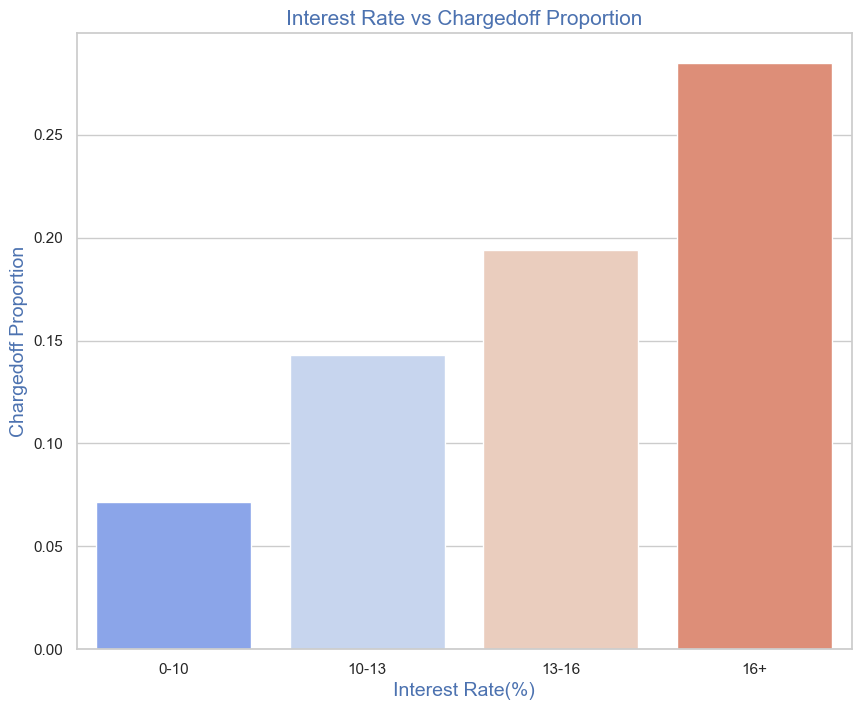

In [175]:
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='w')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='int_rate_catg', y='Chargedoff_Proportion', data=interest_vs_loan, palette='coolwarm')
ax1.set_xlabel('Interest Rate(%)',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

## Observations:  Interest rates are starting from minimin 5 %. Interest rate less than 10% has very less chances of charged off. Interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates. Charged off proportion is increasing with higher interest rates

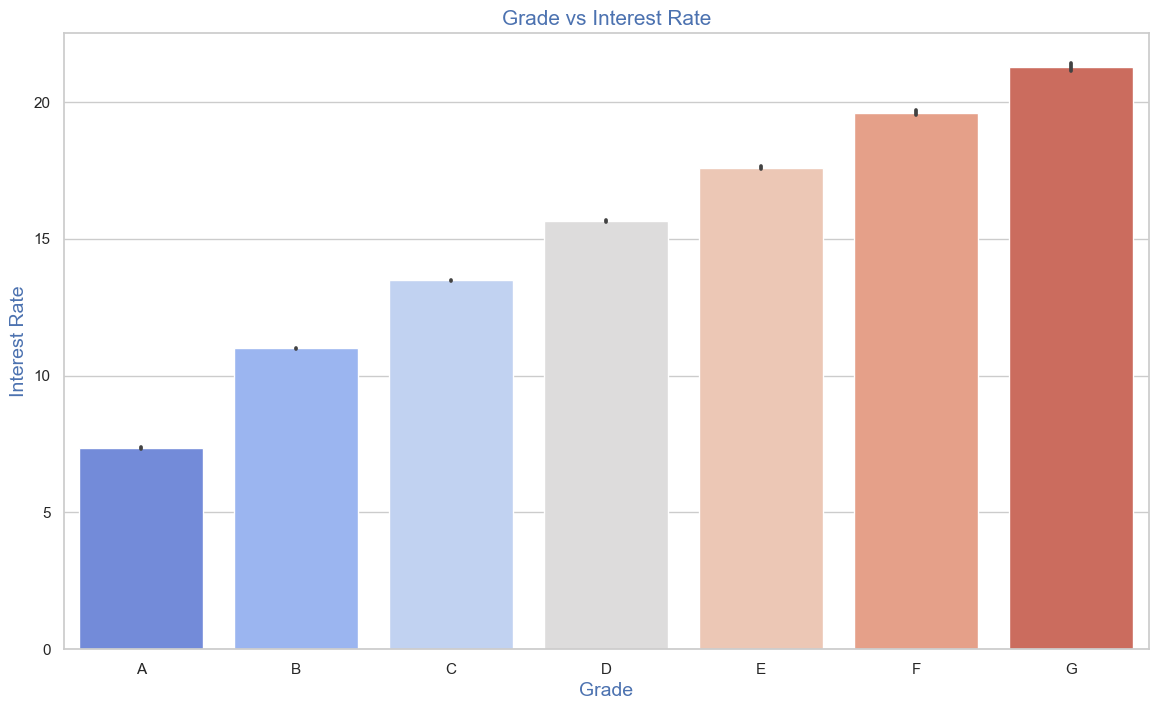

In [176]:
# Bivariate Analysis - Grade vs Interest Rate
plt.figure(figsize=(14,8),facecolor='w')
ax = sns.barplot(y='int_rate%', x='grade', data =loan_df,palette='coolwarm',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
plt.show()

## Observations: A-grade is a top grade for a lender to assign to a borrower. Higher borrower's credit grade is offered with lower interest rate on a loan. Interest rate is increasing with grades moving from A to F.

In [177]:
# Bivariate Analysis - Derrogatory Public Record vs Charged off proportion
bankruptcies_vs_loan = loan_df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,455.00,1550.00,2005.00,0.23
2,2,10.00,37.00,47.00,0.21
0,0,5146.00,31285.00,36431.00,0.14
3,3,0.00,7.00,7.00,0.00
4,4,0.00,2.00,2.00,0.00


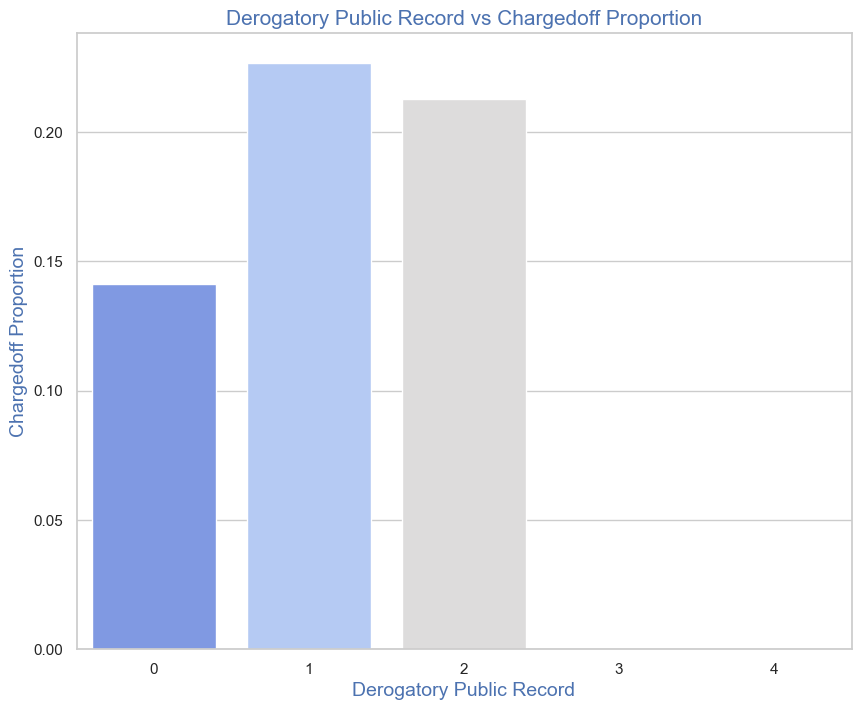

In [178]:
# Bivariate Analysis - Derrogatory Public Record vs Charged off proportion
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='w')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan, palette='coolwarm')
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

## Observations: Pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record. Pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

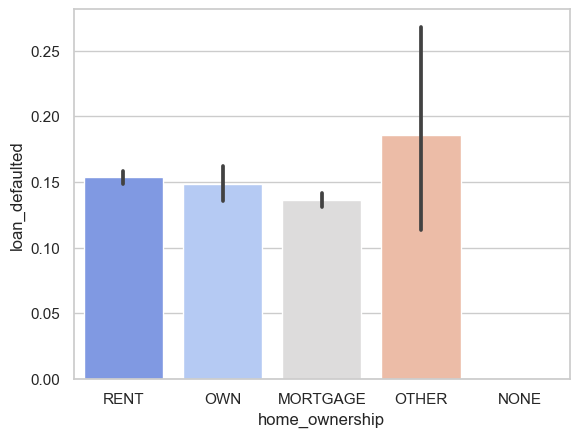

In [179]:
sns.barplot (x= 'home_ownership', y = 'loan_defaulted' , palette='coolwarm', data = loan_df)
plt.show()

## Observations: Other home-ownership have high chances of loan default

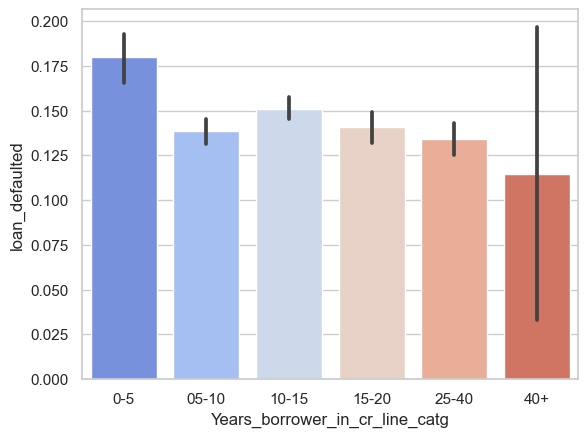

In [180]:
sns.barplot (x= 'Years_borrower_in_cr_line_catg', y = 'loan_defaulted' , palette='coolwarm', data = loan_df)
plt.show()

## Observations: New Borrowers (0-5) and old borrowers (40+) 
## seems to have more loan defaults

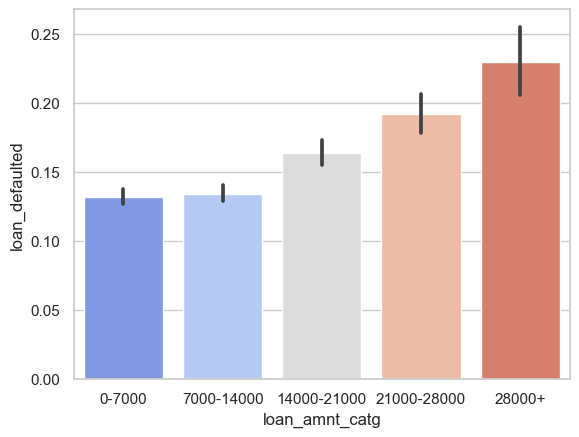

In [181]:
sns.barplot (x= 'loan_amnt_catg', y = 'loan_defaulted' , palette='coolwarm', data = loan_df)
plt.show()

## Observations: Higher loan amount have high chances of loan default

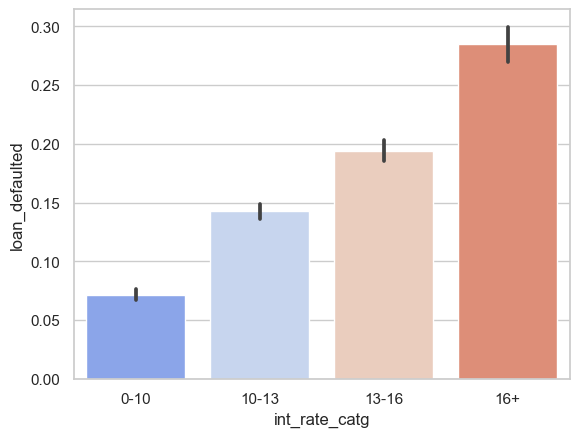

In [182]:
sns.barplot (x= 'int_rate_catg', y = 'loan_defaulted' , palette='coolwarm', data = loan_df)
plt.show()

## Observations: Higher interest rates seems to have higher loan defaulters

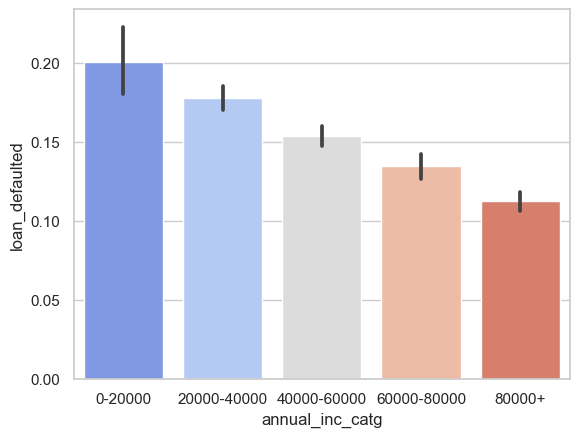

In [183]:
sns.barplot (x= 'annual_inc_catg', y = 'loan_defaulted' , palette='coolwarm', data = loan_df)
plt.show()

## Observations: Borrower's with less income (0-20000) seems to default more

In [184]:
loan_corr_df=loan_df.copy()
loan_corr_input = loan_corr_df.select_dtypes(exclude=['string','object'])
loan_corr_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38492 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   loan_amnt                       38492 non-null  int64   
 1   funded_amnt                     38492 non-null  int64   
 2   funded_amnt_inv                 38492 non-null  int64   
 3   int_rate%                       38492 non-null  int64   
 4   installment                     38492 non-null  int64   
 5   annual_inc                      38492 non-null  int64   
 6   dti                             38492 non-null  int64   
 7   delinq_2yrs                     38492 non-null  int64   
 8   mths_since_last_delinq          38492 non-null  int64   
 9   mths_since_last_record          38492 non-null  int64   
 10  open_acc                        38492 non-null  int64   
 11  pub_rec                         38492 non-null  int64   
 12  revol_bal         

 # Evaluating correlation:

In [185]:
loan_corr_calc = loan_corr_input.corr()

/var/folders/rr/h6v8pysn2vqgg26j399_qlhc0000gn/T/ipykernel_2803/2047280049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_corr_calc = loan_corr_input.corr()


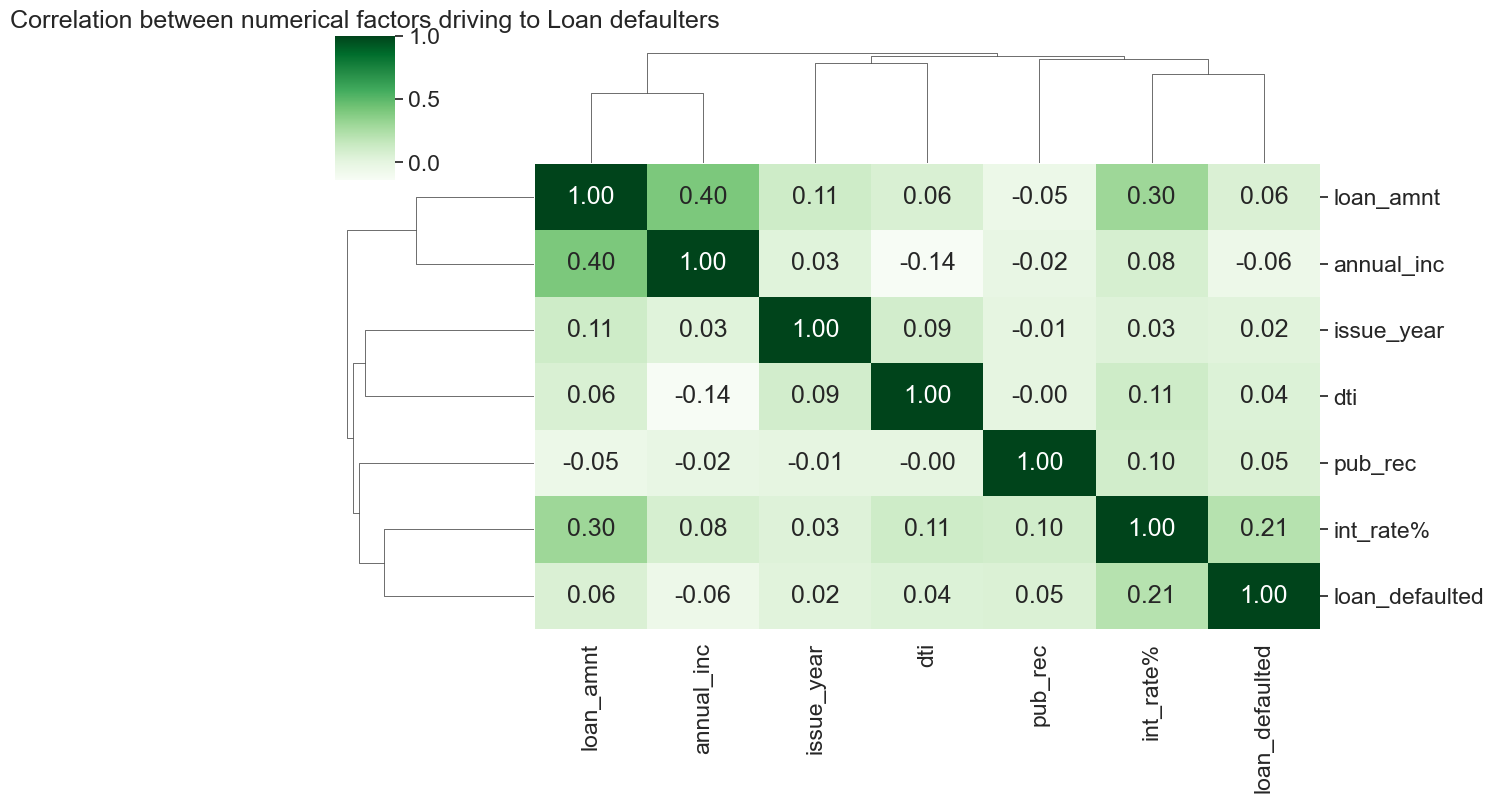

In [186]:
#loan_Corr_Sub = loan_corr_input[['delinq_2yrs', 'open_acc','pub_rec','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']].copy()
loan_Corr_Sub = loan_corr_input[['loan_amnt', 'annual_inc','pub_rec','issue_year','int_rate%','loan_defaulted','dti']].copy()
sns.set(font_scale=1.5)
loan_corrvalue_sub = loan_Corr_Sub.corr()
sns.clustermap(loan_corrvalue_sub,annot=True,figsize=(12, 8),cmap="Greens", fmt='.2f')
plt.title("Correlation between numerical factors driving to Loan defaulters") 
plt.show()

## Observations: Below mentioned details are having strong correlation 

## Increase in interest rate with loan amount 

## Increase in Loan defaulters with interest rate

## Increase in loan amount provision with annual income